In [5]:
import os
import gc
import pandas as pd
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import json
from datetime import datetime
import random
from sklearn import preprocessing
from collections import defaultdict
pd.options.display.max_columns = 100
os.chdir('./')
random.seed(10)
data_type = {'id':'U'}

# Part 1: Data Explore

In [6]:
random.seed(1)
sample_data = pd.read_csv('./avazu-ctr-prediction/train/train.csv',nrows= 10,dtype=data_type)
train = pd.read_csv('./avazu-ctr-prediction/train/train.csv' ,dtype=sample_data.dtypes.to_dict(),low_memory=False)
#train = pd.read_csv('./avazu-ctr-prediction/train/train.csv' ,dtype=data_type,skiprows=lambda x:  random.random()>0.2,low_memory=True)
train.columns = sample_data.columns
test = pd.read_csv('./avazu-ctr-prediction/test/test.csv',dtype=sample_data.dtypes.to_dict(),low_memory=True)
test.insert(1,'click',2)
print(f'(Train:{len(train)}, Test:{len(test)})')
train = pd.concat([test, train], copy=False, ignore_index=True)
del test
gc.collect()
print(f'(Train+Test):{len(train)}')

(Train:40428967, Test:4577464)
(Train+Test):45006431


In [7]:
print(train.dtypes)
print('='*100)
print(train.describe())
print('='*100)
train.head()

id                  object
click                int64
hour                 int64
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
dtype: object
              click          hour            C1    banner_pos   device_type  \
count  4.500643e+07  4.500643e+07  4.500643e+07  4.500643e+07  4.500643e+07   
mean   3.559490e-01  1.410261e+07  1.004970e+03  2.801853e-01  1.014720e+00   
std    6.577713e-01  3.271810e+02  1.079059e+00  5.035733e-01  5.181853e-01   
min    0.000000e+00  1

id  click      hour    C1  banner_pos   site_id  \
0  10000174058809263569      2  14103100  1005           0  235ba823   
1  10000182526920855428      2  14103100  1005           0  1fbe01fe   
2  10000554139829213984      2  14103100  1005           0  1fbe01fe   
3  10001094637809798845      2  14103100  1005           0  85f751fd   
4  10001377041558670745      2  14103100  1005           0  85f751fd   

  site_domain site_category    app_id app_domain app_category device_id  \
0    f6ebf28e      f028772b  ecad2386   7801e8d9     07d7df22  a99f214a   
1    f3845767      28905ebd  ecad2386   7801e8d9     07d7df22  a99f214a   
2    f3845767      28905ebd  ecad2386   7801e8d9     07d7df22  a99f214a   
3    c4e18dd6      50e219e0  51cedd4e   aefc06bd     0f2161f8  a99f214a   
4    c4e18dd6      50e219e0  9c13b419   2347f47a     f95efa07  a99f214a   

  device_ip device_model  device_type  device_conn_type    C14  C15  C16  \
0  69f45779     0eb711ec            1                 0   8330  320   50   
1  e8d44657     ecb851b2            1                 0  22676  320   50   
2  10fb085b     1f0bc64f            1                 0  22676  320   50   
3  422d257a     542422a7            1                 0  18648  320   50   
4  078c6b38     1f0bc64f            1                 0  23160  320   50   

    C17  C18  C19     C20  C21  
0   761    3  175  100075   23  
1  2616    0   35  100083   51  
2  2616    0   35  100083   51  
3  1092    3  809  100156   61  
4  2667    0   47      -1  221

In [8]:
n = len(train )
for i in train.columns :
    print(i,f'{len(train[i].value_counts())}/{n}')

id 45006427/45006431
click 3/45006431
hour 264/45006431
C1 7/45006431
banner_pos 7/45006431
site_id 4842/45006431
site_domain 7912/45006431
site_category 26/45006431
app_id 9136/45006431
app_domain 580/45006431
app_category 36/45006431
device_id 2895973/45006431
device_ip 7338655/45006431
device_model 8303/45006431
device_type 5/45006431
device_conn_type 4/45006431
C14 2885/45006431
C15 8/45006431
C16 9/45006431
C17 474/45006431
C18 4/45006431
C19 69/45006431
C20 172/45006431
C21 62/45006431


In [9]:
# 計算全部(train+test)類別
s = datetime.now()
for i in train.columns:
    if i != 'id' and i != 'click':
        with open(f'./avazu-ctr-prediction/all_columns/{i}_counts.json','w') as f:
            f.write(train[i].value_counts().to_json())
        print(i ,datetime.now() - s)

hour 0:00:00.324537
C1 0:00:00.649263
banner_pos 0:00:00.951089
site_id 0:00:03.897402
site_domain 0:00:06.807503
site_category 0:00:09.358548
app_id 0:00:12.190013
app_domain 0:00:14.710200
app_category 0:00:17.360914
device_id 0:00:26.024390
device_ip 0:01:04.161354
device_model 0:01:07.665363
device_type 0:01:08.009348
device_conn_type 0:01:08.300352
C14 0:01:08.715356
C15 0:01:09.034355
C16 0:01:09.350358
C17 0:01:09.675355
C18 0:01:09.975352
C19 0:01:10.291352
C20 0:01:10.597355
C21 0:01:10.913355


# Part2 : Transformation

C1 2023-01-14 10:01:40.115170
click         0        1        2
C1                               
1005   30851576  6289056  4316693
1002    1752817   467995   167425
1010     817434    86023    67260
1012      93932    19580    14395
1007      33912     1392     9700
1001       9147      316     1990
1008       5083      704        1


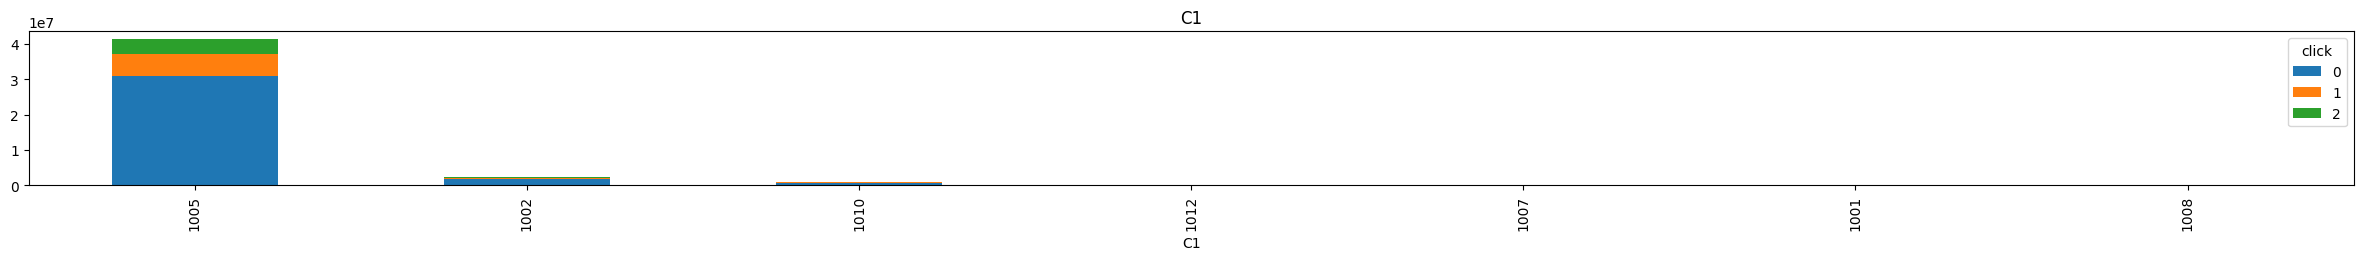

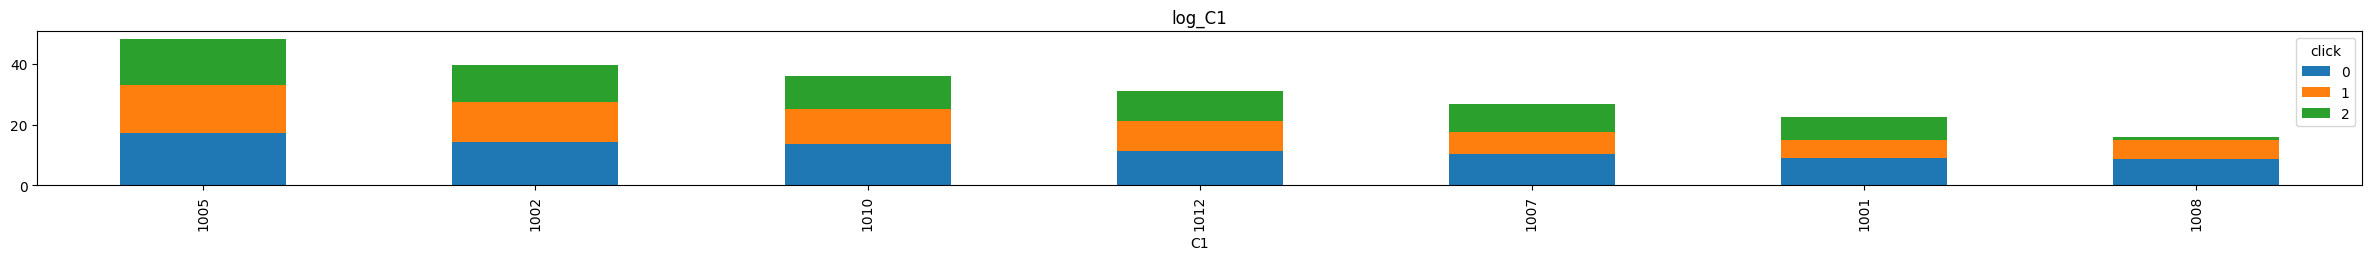

C14 2023-01-14 10:01:45.045170
click         0         1        2
C14                               
4687   711755.0  236460.0  30033.0
21611  856375.0   50629.0  59401.0
21189  750737.0   15231.0  15135.0
21191  750041.0   15051.0  14770.0
19771  647023.0   83215.0  45286.0
...         ...       ...      ...
19279       NaN       NaN    366.0
22763       NaN       NaN    365.0
14202       NaN       NaN    363.0
23375       NaN       NaN    363.0
23826       NaN       NaN    361.0

[805 rows x 3 columns]


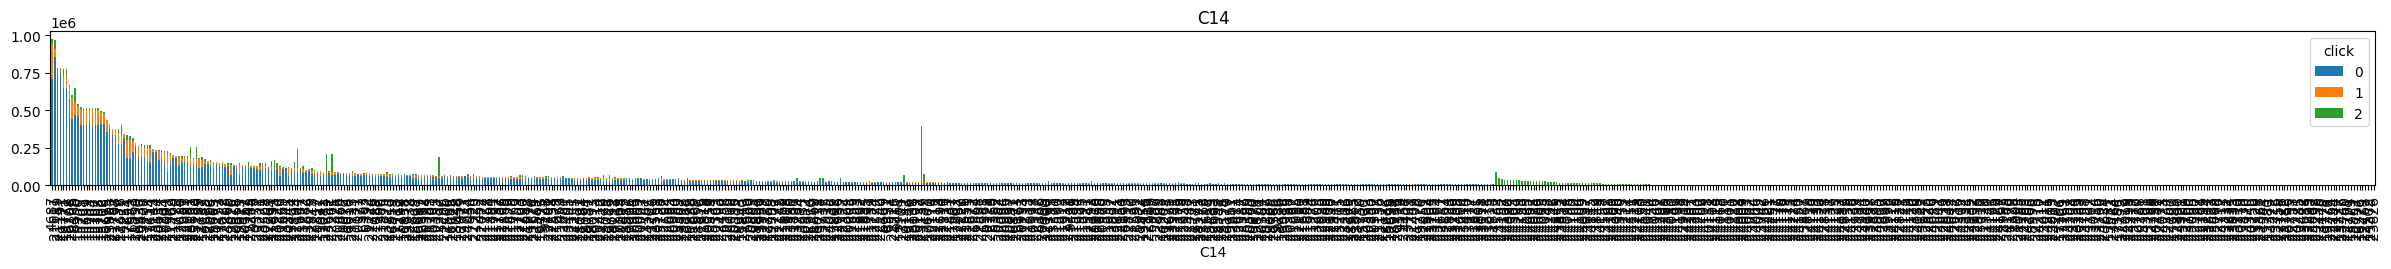

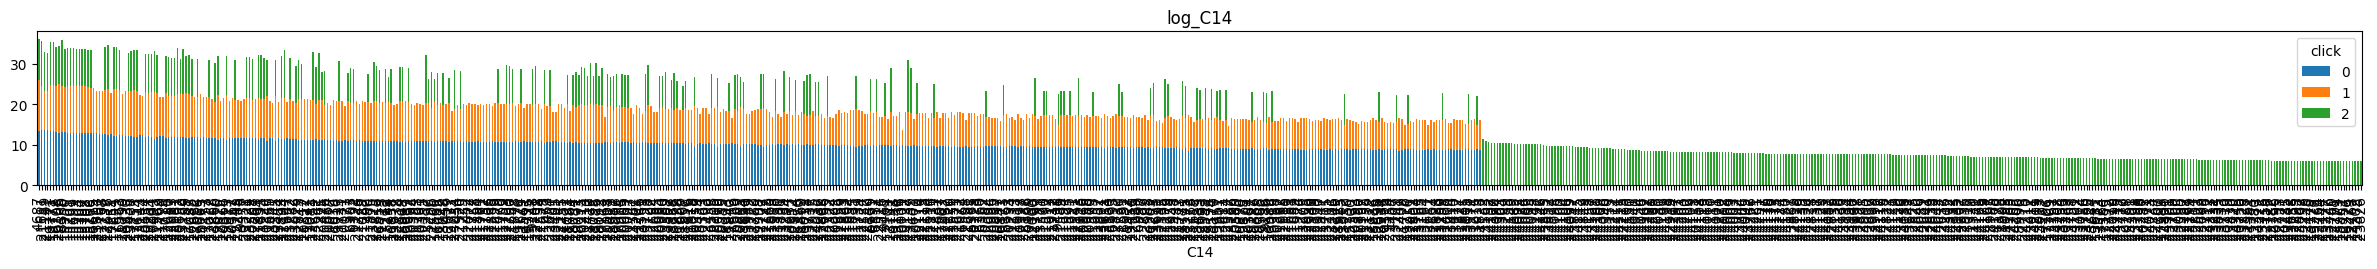

C15 2023-01-14 10:02:08.881568
click         0        1        2
C15                              
320    31728024  5980935  4294482
300     1497369   839925   239865
216      260806    37988    23051
728       70287     4246    19229
120        3011       58       46
1024       1908      652      301
480        1565      572      171
768         931      690      319


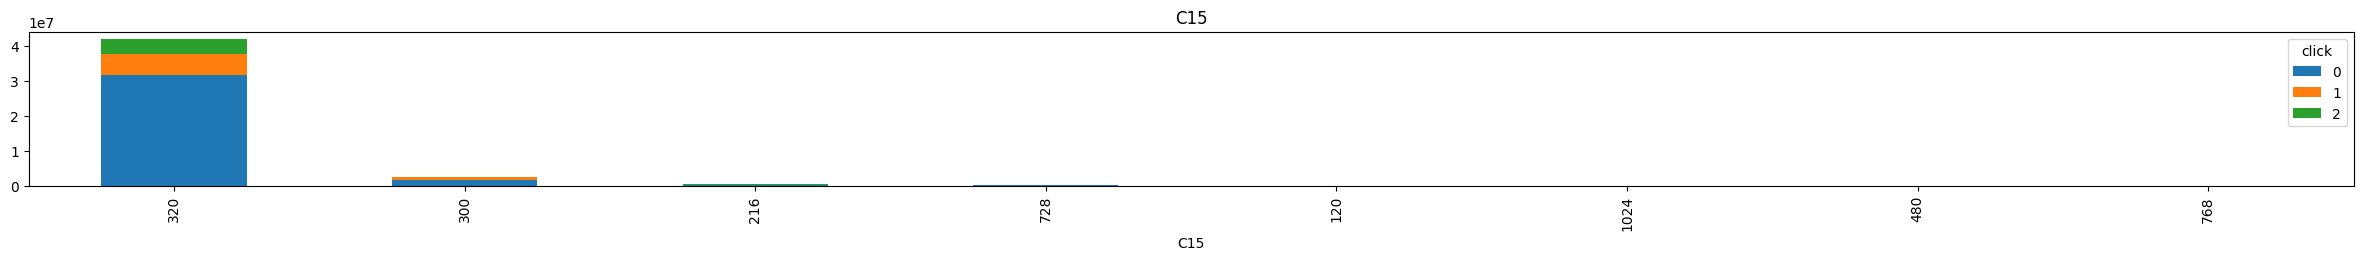

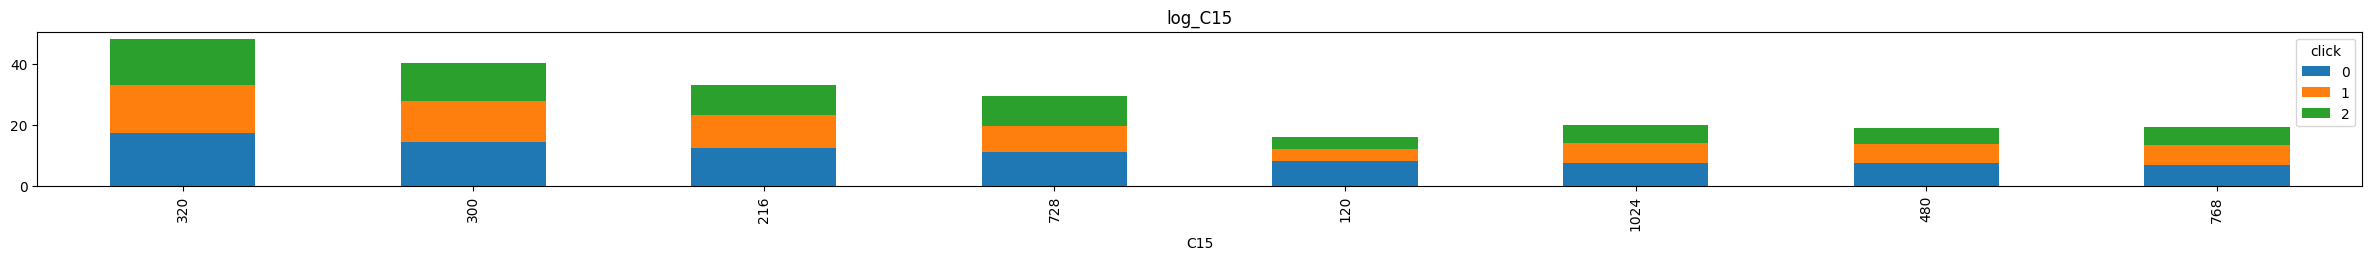

C16 2023-01-14 10:02:14.031568
click         0        1        2
C16                              
50     32098965  6037589  4335701
250     1045241   761093   185809
36       260806    37988    23051
480       81187    22178    12837
90        70287     4246    19229
20         3011       58       46
768        1908      652      301
320        1565      572      171
1024        931      690      319


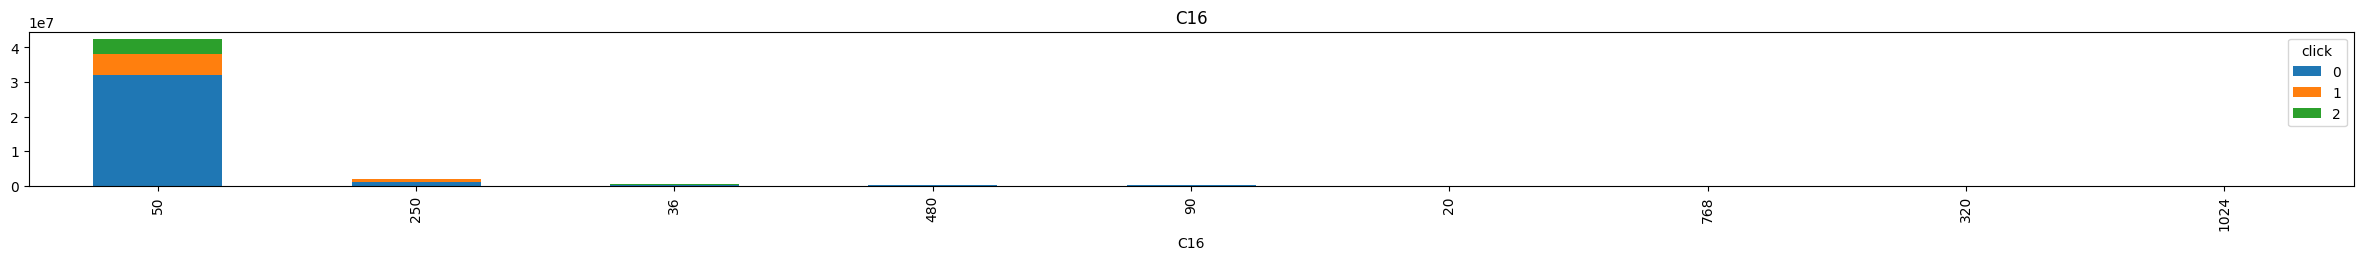

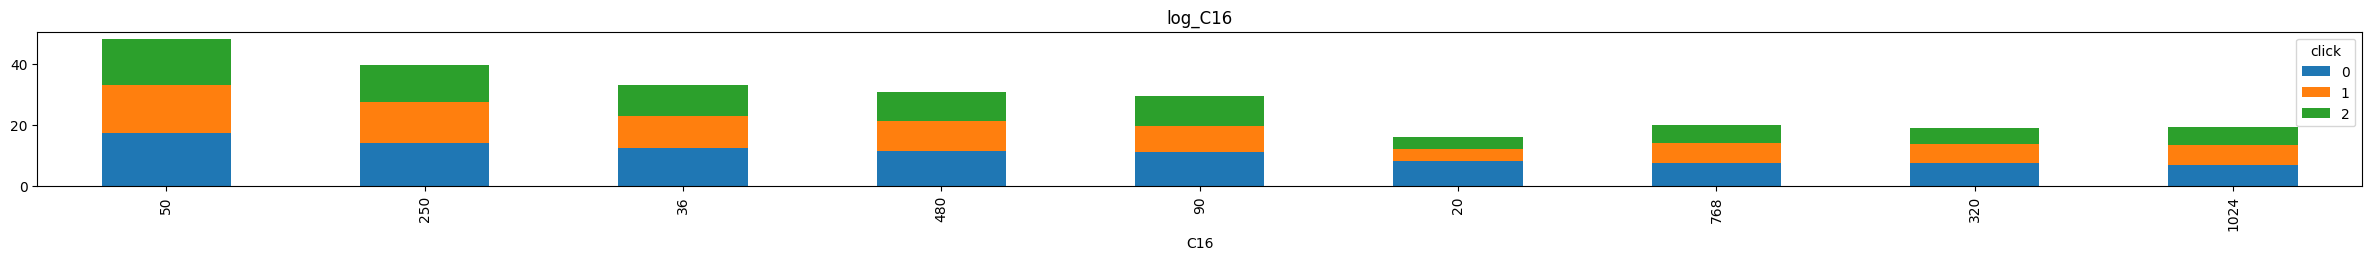

C17 2023-01-14 10:02:18.896568
click          0         1        2
C17                                
1722   3657712.0  855780.0  98024.0
2424   1500789.0   30282.0  29905.0
2227   1306892.0  166213.0  89864.0
1800   1043713.0  146448.0  27358.0
423     711755.0  236460.0  30033.0
...          ...       ...      ...
2750         NaN       NaN   1375.0
2783         NaN       NaN    827.0
1969         NaN       NaN    402.0
2762         NaN       NaN      2.0
2191         NaN       NaN      1.0

[474 rows x 3 columns]


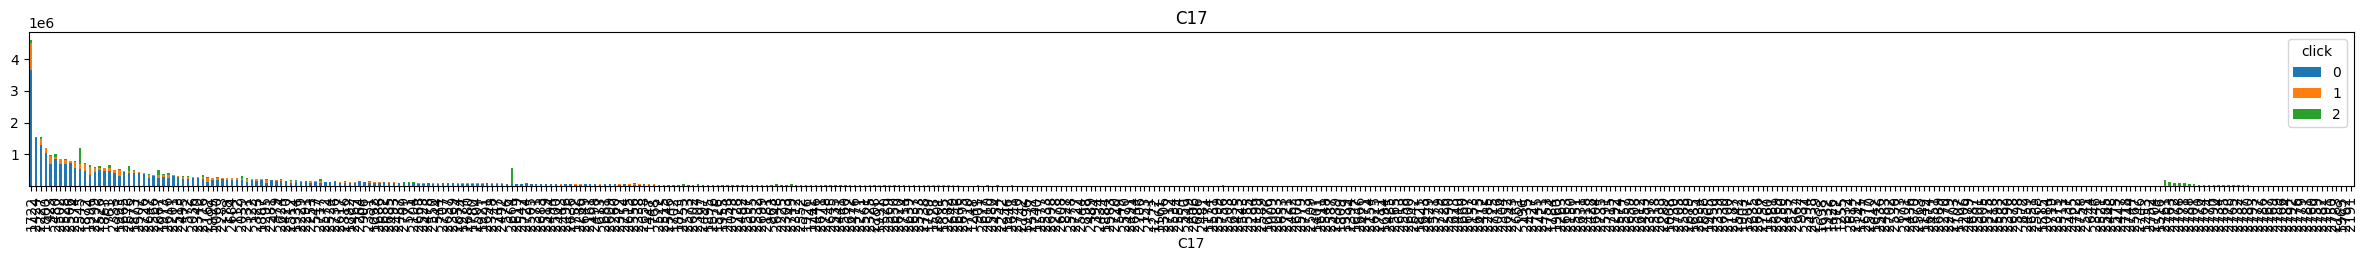

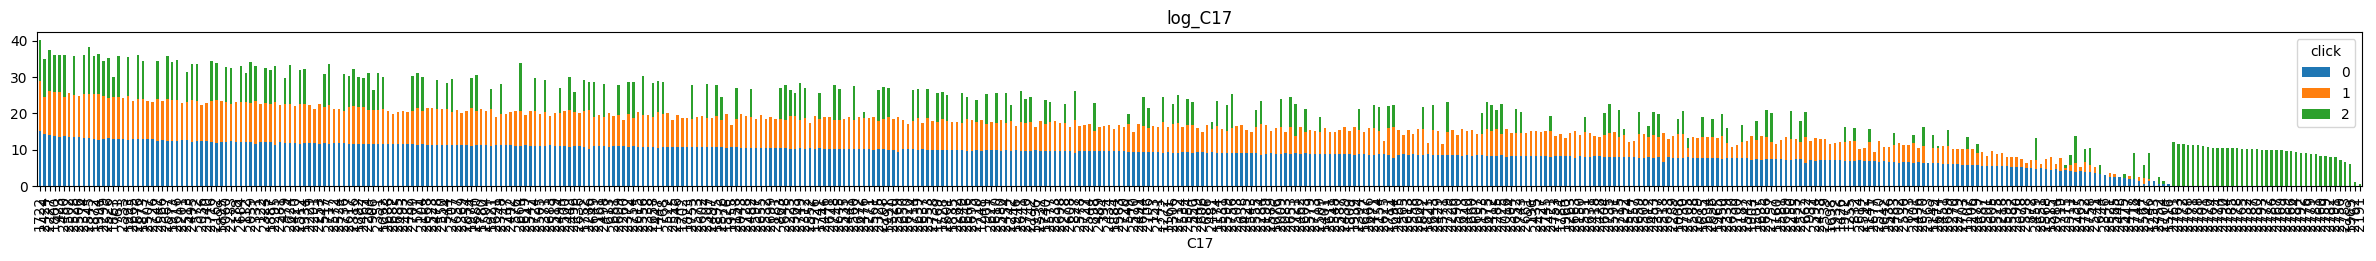

C18 2023-01-14 10:02:35.511569
click         0        1        2
C18                              
0      14258872  2680172  2122105
3      11661360  1992882  1291718
2       5016993  2099065   934132
1       2626676    92947   229509


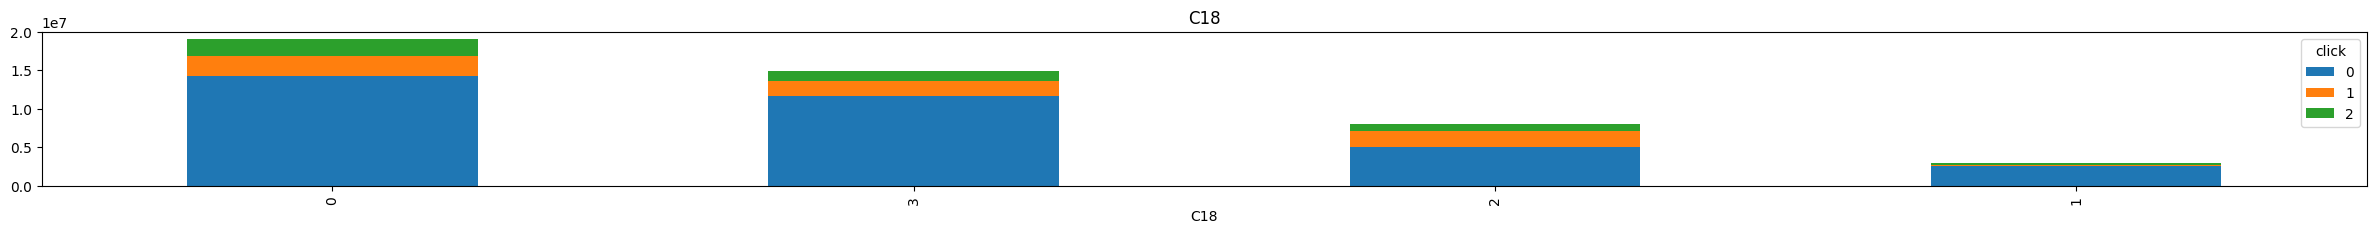

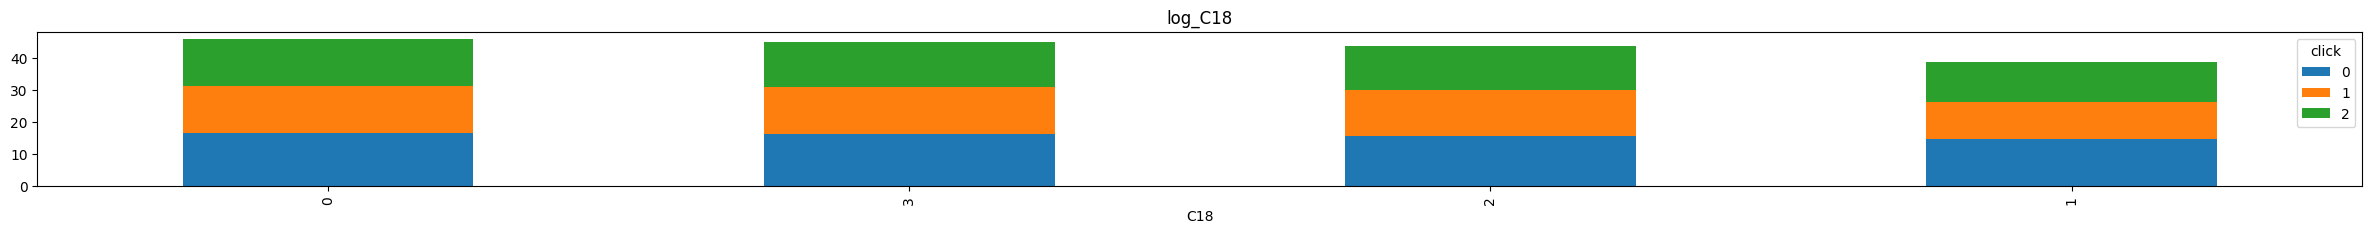

C19 2023-01-14 10:02:40.475569
click           0          1          2
C19                                    
35     10140528.0  2030102.0  1522664.0
39      6673606.0  2155820.0   853671.0
167     2636686.0   509009.0   249039.0
161     1550970.0    36795.0    38461.0
47      1194374.0   257334.0   180346.0
...           ...        ...        ...
1195        130.0        2.0        NaN
545          98.0       19.0        NaN
677           8.0        0.0        2.0
1959          1.0        1.0        NaN
1199          NaN        NaN      857.0

[69 rows x 3 columns]


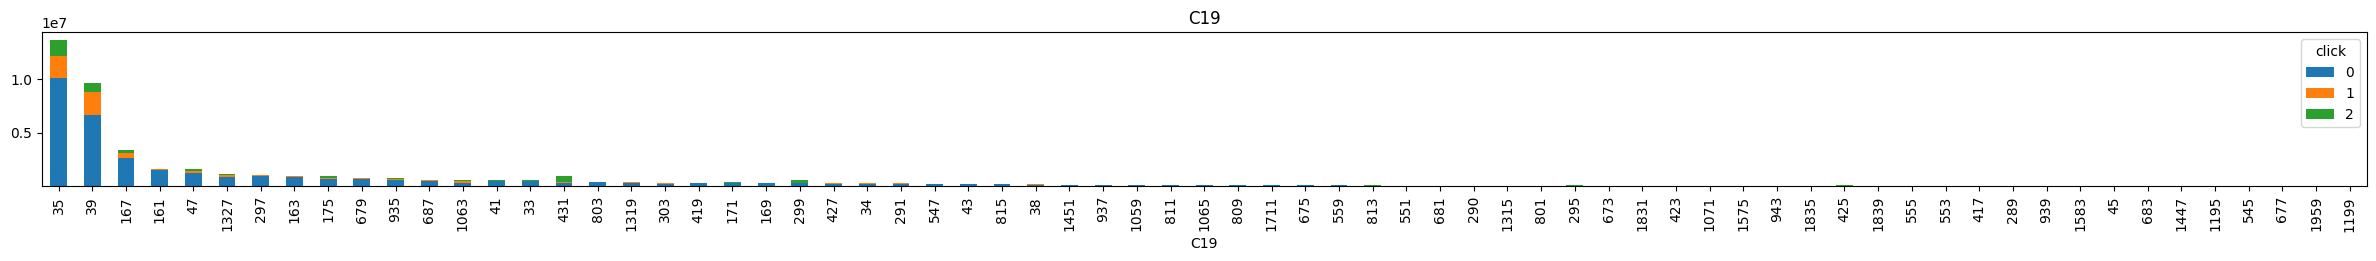

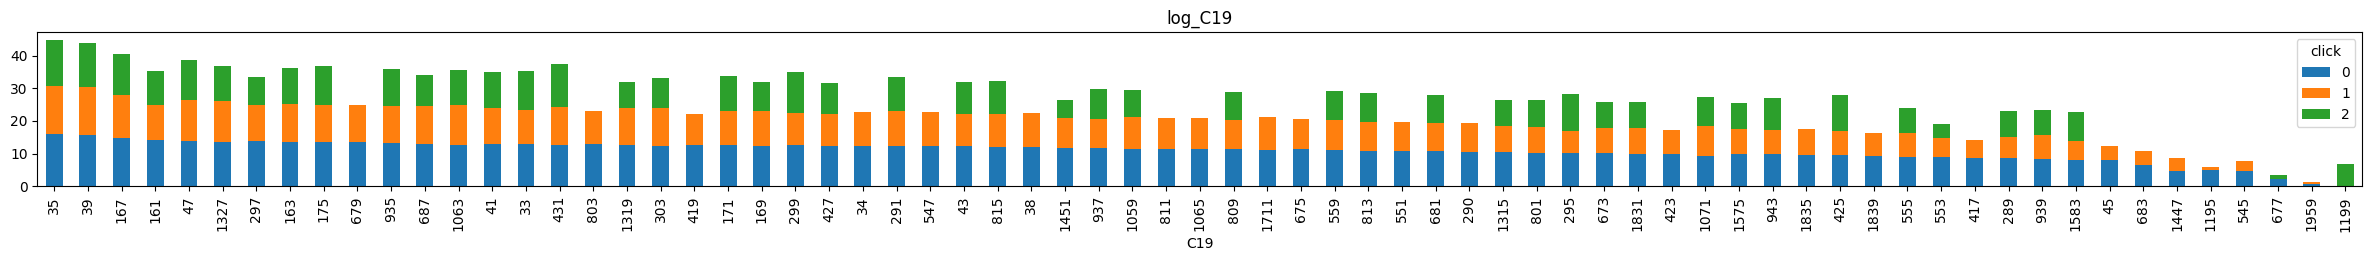

C20 2023-01-14 10:02:48.039578
click           0        1          2
C20                                  
-1       15286825  3651093  2132741.0
 100084   1916806   521672   439590.0
 100148   1376611   418279   318053.0
 100111   1567181   149552   129334.0
 100077   1299033   276462   110370.0
...           ...      ...        ...
 100006         3        2        NaN
 100187         3        0        2.0
 100209         2        0        NaN
 100008         2        0        NaN
 100198         1        0        NaN

[172 rows x 3 columns]


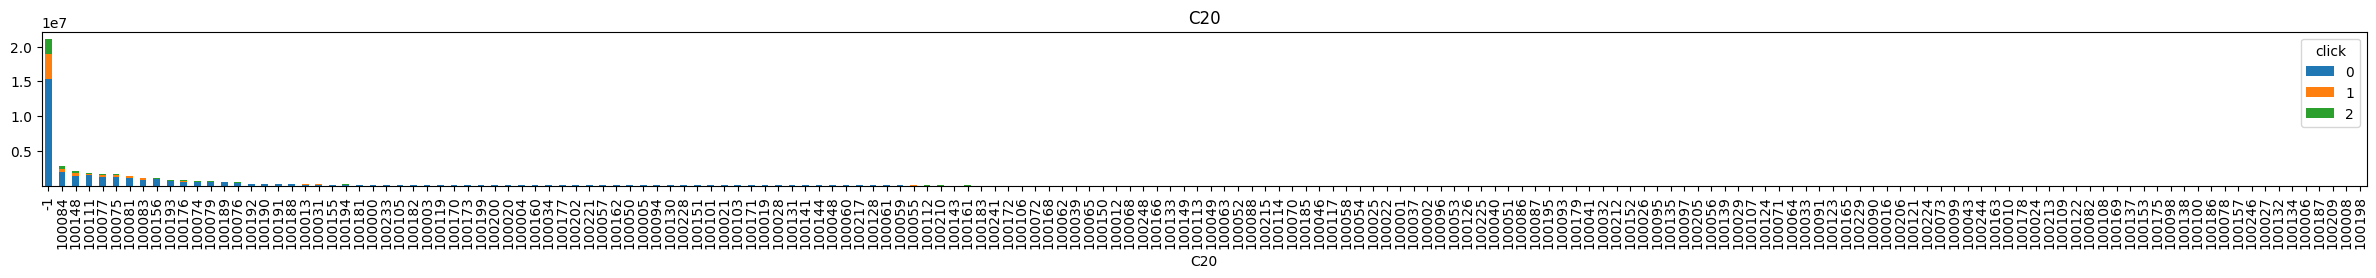

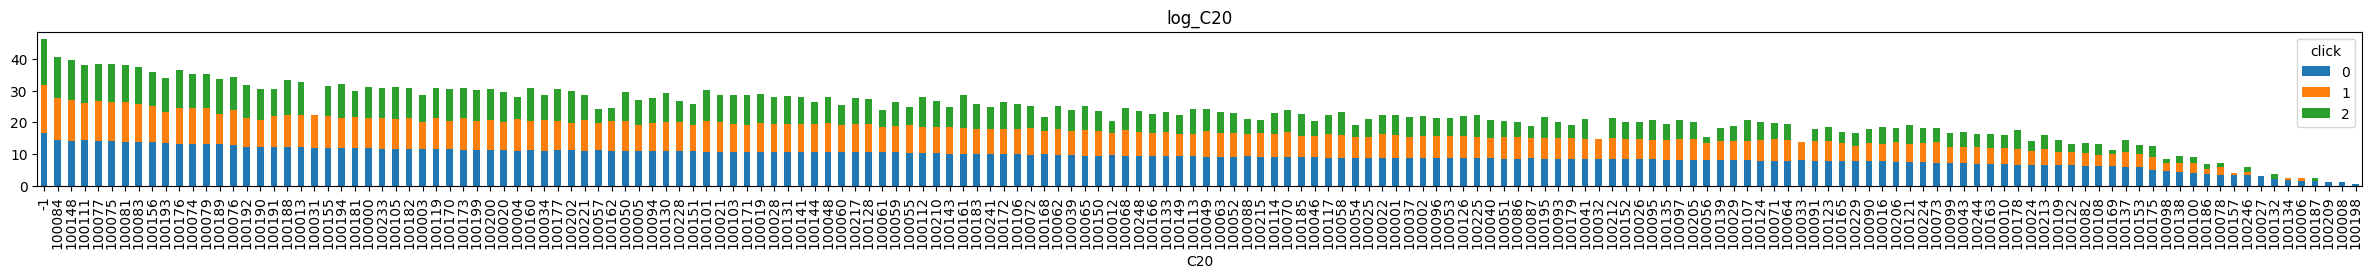

C21 2023-01-14 10:02:57.719569
click          0          1         2
C21                                  
23     7001811.0  1894394.0  995303.0
221    4204249.0   846996.0  966672.0
79     3748397.0   866402.0  267296.0
48     1862483.0   298311.0  104230.0
71     2049035.0    59461.0  228373.0
..           ...        ...       ...
1         2611.0      416.0       NaN
219       1644.0      121.0     276.0
85         425.0       72.0       NaN
240          NaN        NaN  196767.0
184          NaN        NaN       1.0

[62 rows x 3 columns]


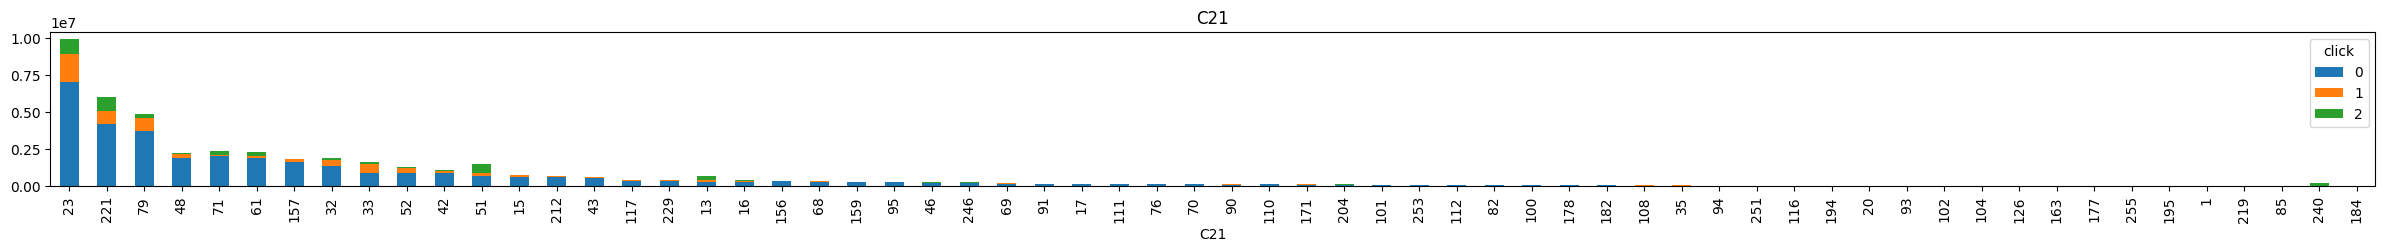

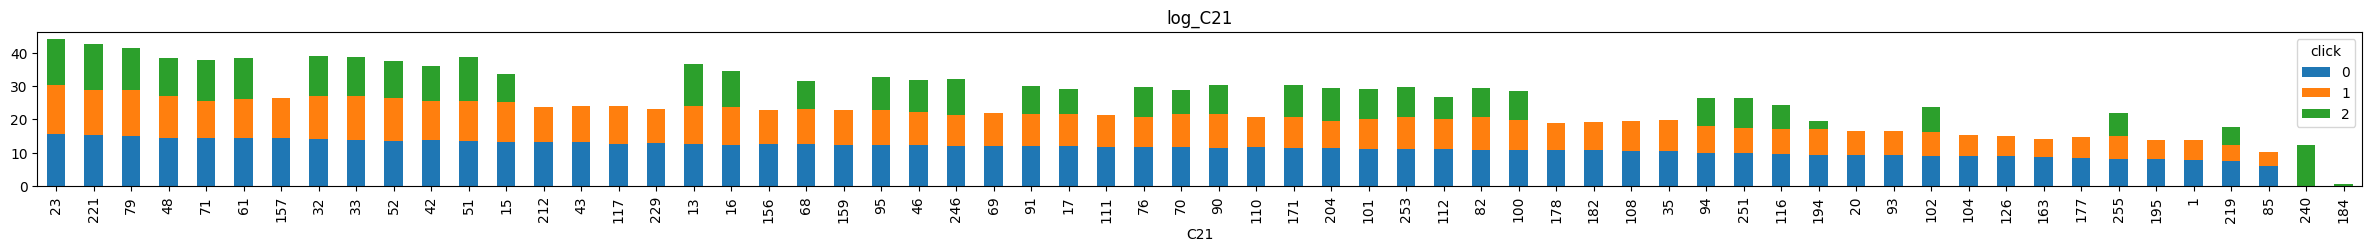

device_id 2023-01-14 10:03:05.237569
click               0          1          2
device_id                                  
a99f214a   27548893.0  5809415.0  3941701.0
0f7c61dc       5166.0    16190.0        NaN
c357dbff       7198.0    12469.0        NaN
936e92fb      12837.0      875.0      844.0
afeffc18       7443.0     2211.0     2358.0
...               ...        ...        ...
327ef642          NaN        NaN       44.0
4b028f19          NaN        NaN       44.0
4cd62ba2          NaN        NaN       44.0
5065a870          NaN        NaN       44.0
5a66146a          NaN        NaN       44.0

[958 rows x 3 columns]


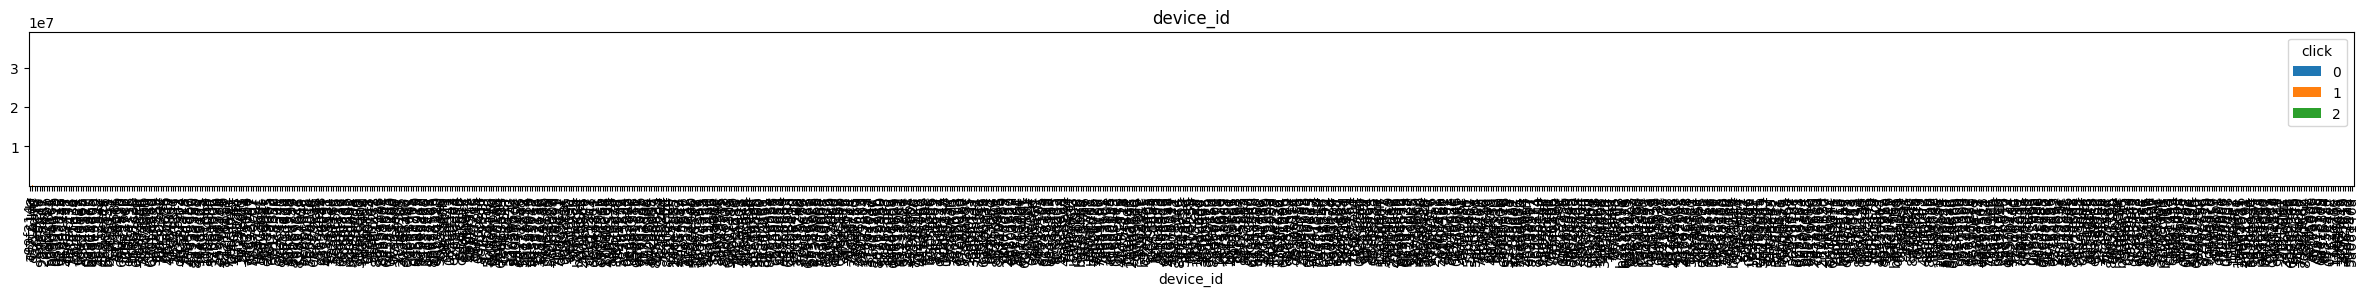

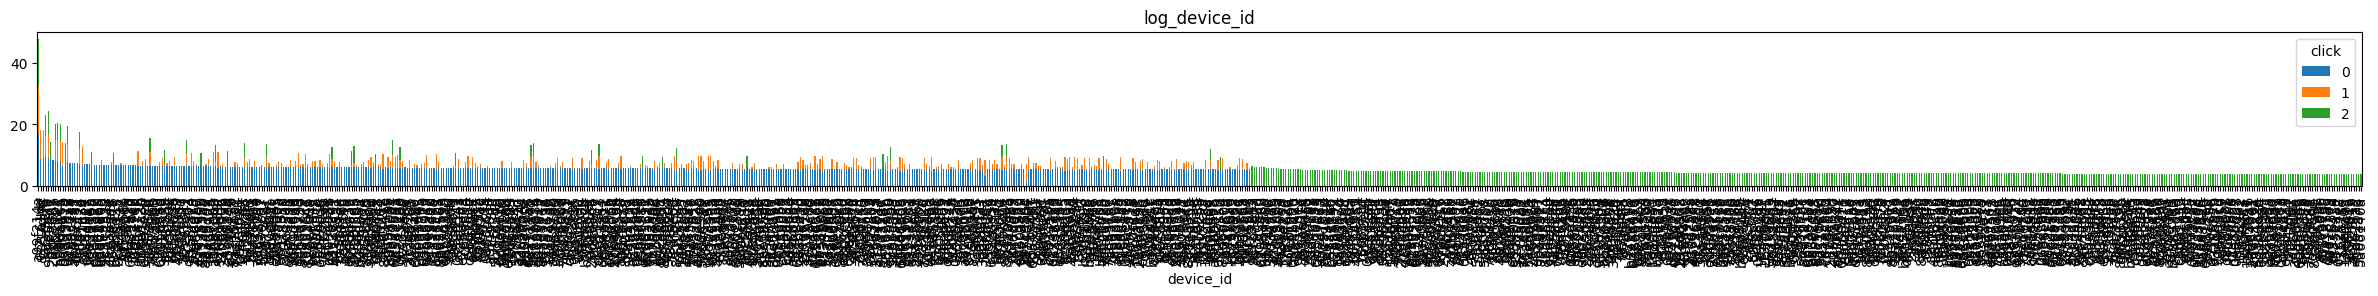

device_ip 2023-01-14 10:05:06.411450
click             0        1        2
device_ip                            
6b9769f2   162714.0  45987.0  19936.0
431b3174   108966.0  26356.0  10840.0
2f323f36    79765.0   8734.0   2277.0
af9205f9    79406.0   8438.0   1895.0
930ec31d    78825.0   8171.0   2436.0
...             ...      ...      ...
12345cd5        NaN      NaN    280.0
193e121a        NaN      NaN    280.0
36259c48        NaN      NaN    279.0
cf1c2b39        NaN      NaN    279.0
2a7c3766        NaN      NaN    277.0

[653 rows x 3 columns]


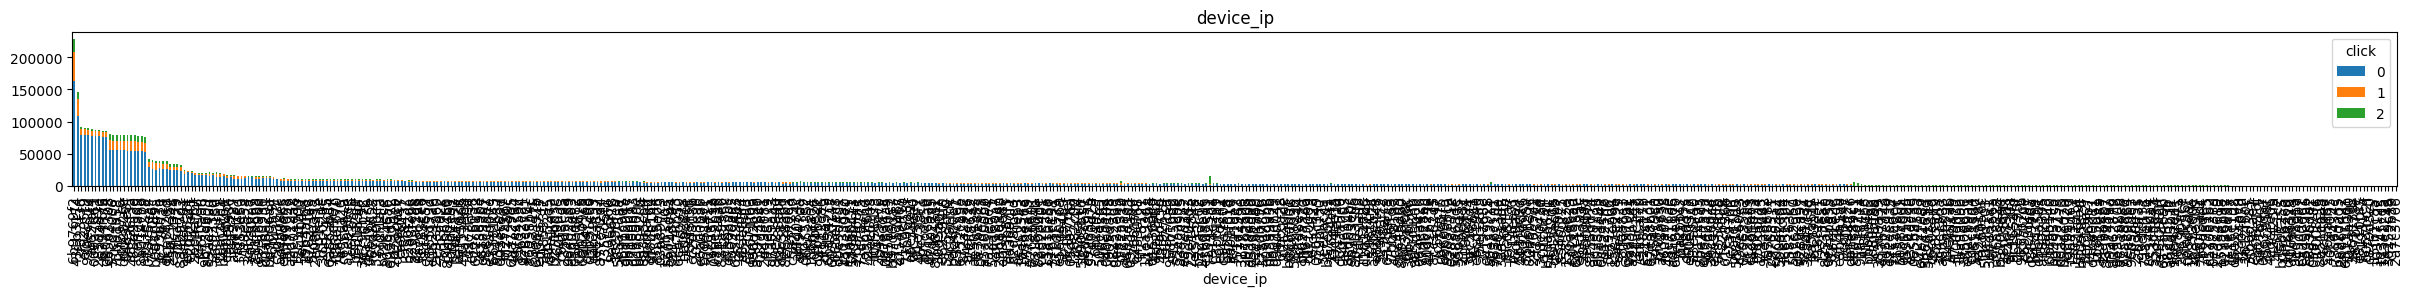

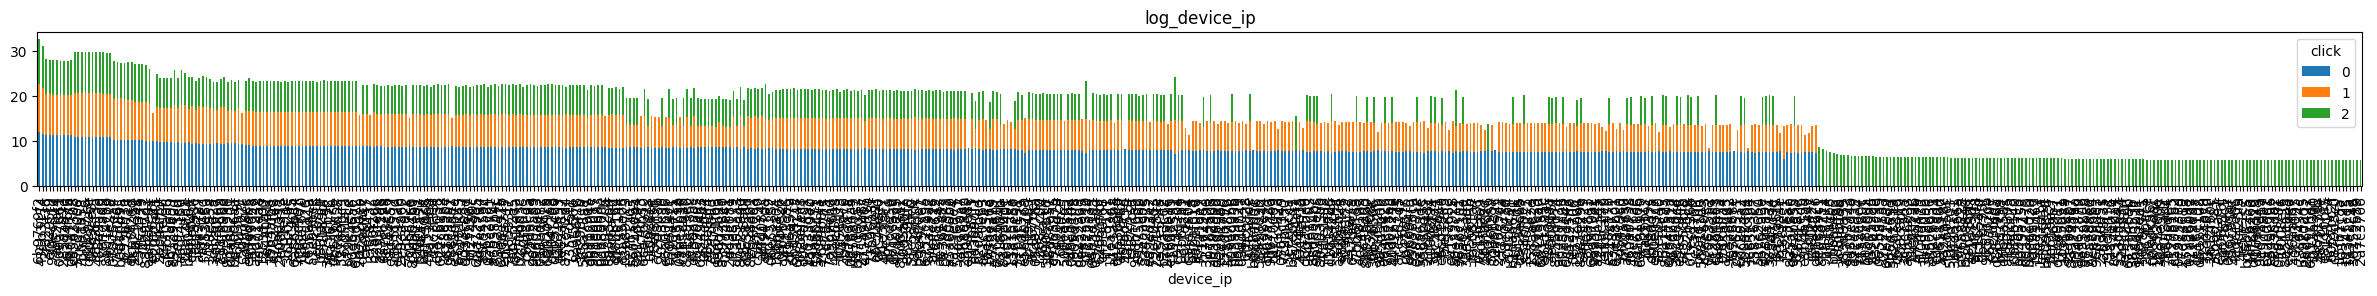

device_model 2023-01-14 10:10:13.413530
click                 0         1         2
device_model                               
8a4875bd      2116114.0  339356.0  197315.0
1f0bc64f      1104748.0  319798.0  210977.0
d787e91b      1090595.0  314574.0  185468.0
76dc4769       622575.0  145386.0   78394.0
be6db1d7       602936.0  139977.0   85581.0
...                 ...       ...       ...
74b0fc2c            NaN       NaN    1085.0
4abd7cbc            NaN       NaN    1079.0
e1f641eb            NaN       NaN    1059.0
e215cd18            NaN       NaN    1038.0
b588c462            NaN       NaN    1028.0

[558 rows x 3 columns]


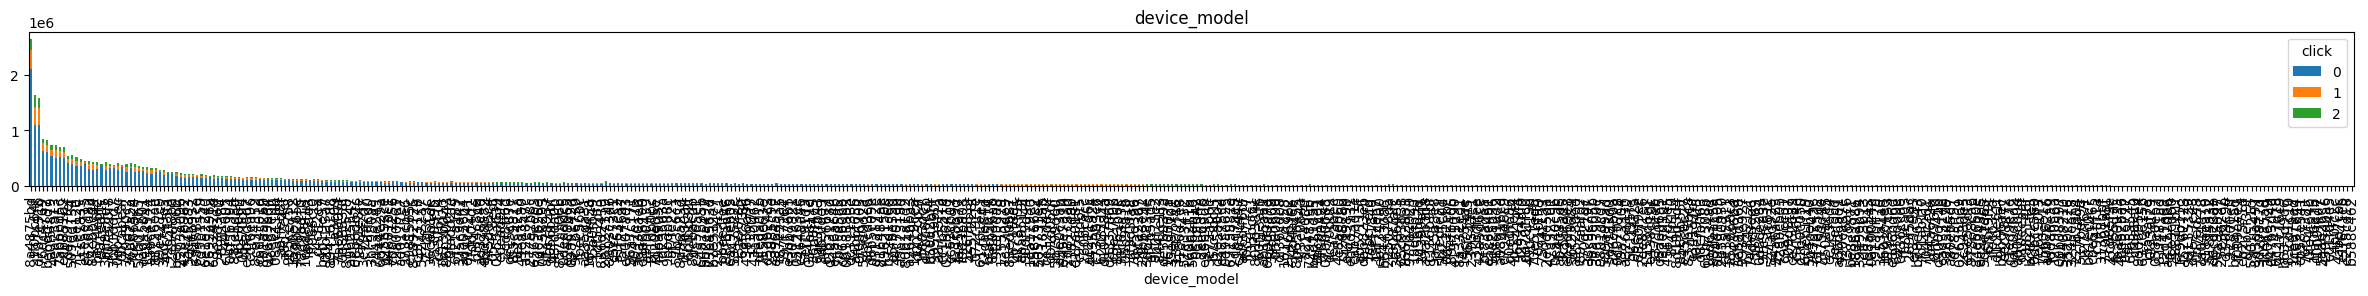

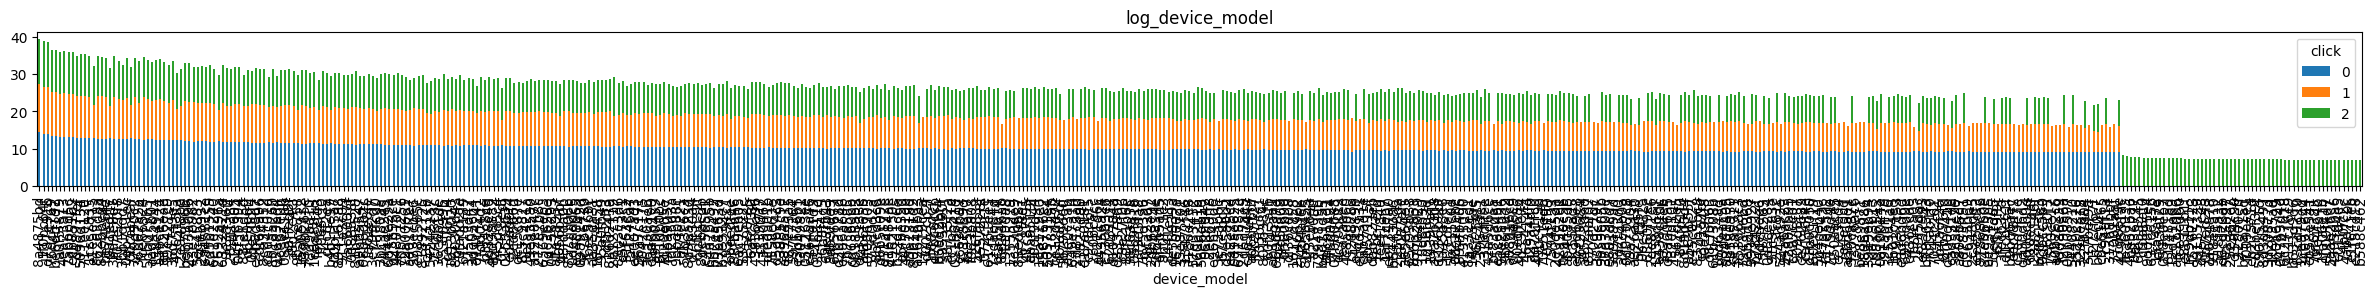

device_type 2023-01-14 10:10:36.421768
click               0        1          2
device_type                              
1            30993621  6311046  4342779.0
0             1752817   467995   167425.0
4              700372    73900    57877.0
5              117062    12123     9383.0
2                  29        2        NaN


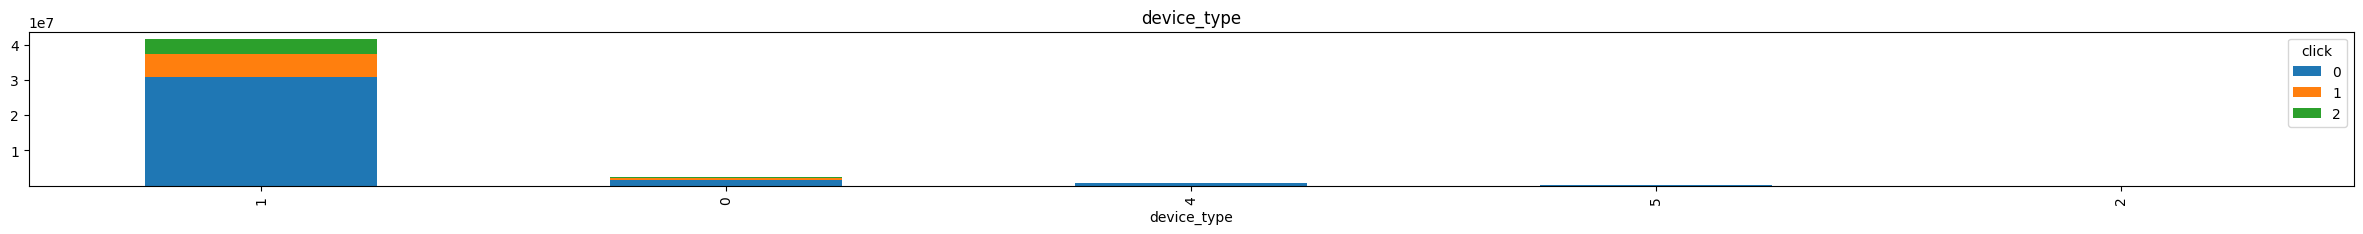

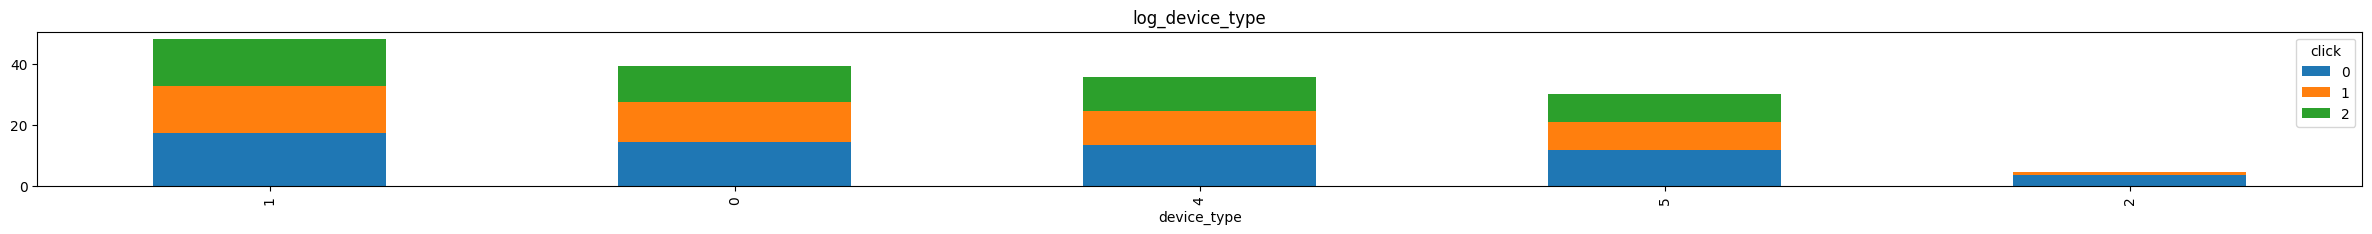

device_conn_type 2023-01-14 10:10:41.522767
click                    0        1        2
device_conn_type                            
0                 28567949  6318889  3858479
2                  2868628   448815   459847
3                  2085704    96092   249814
5                    41620     1270     9324


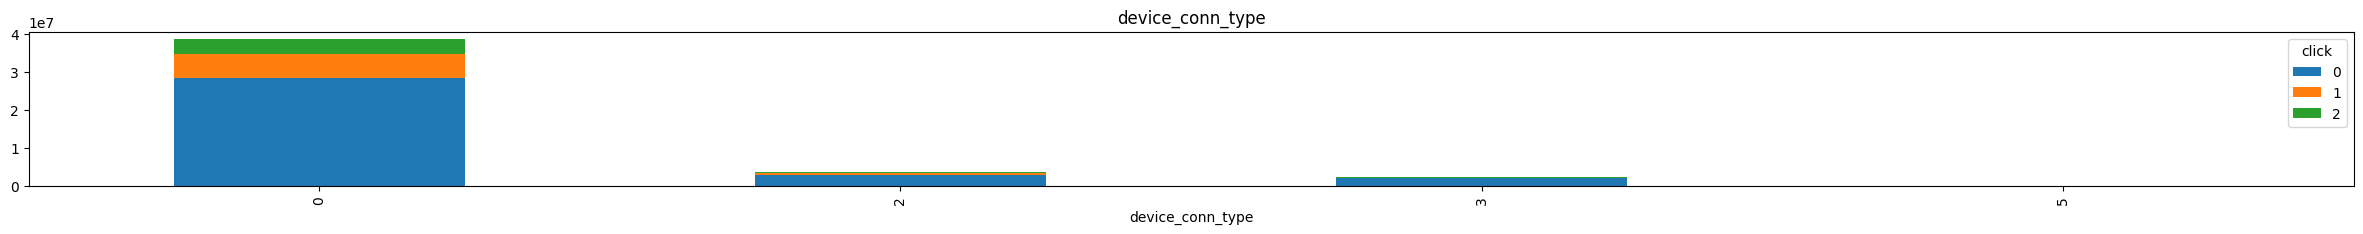

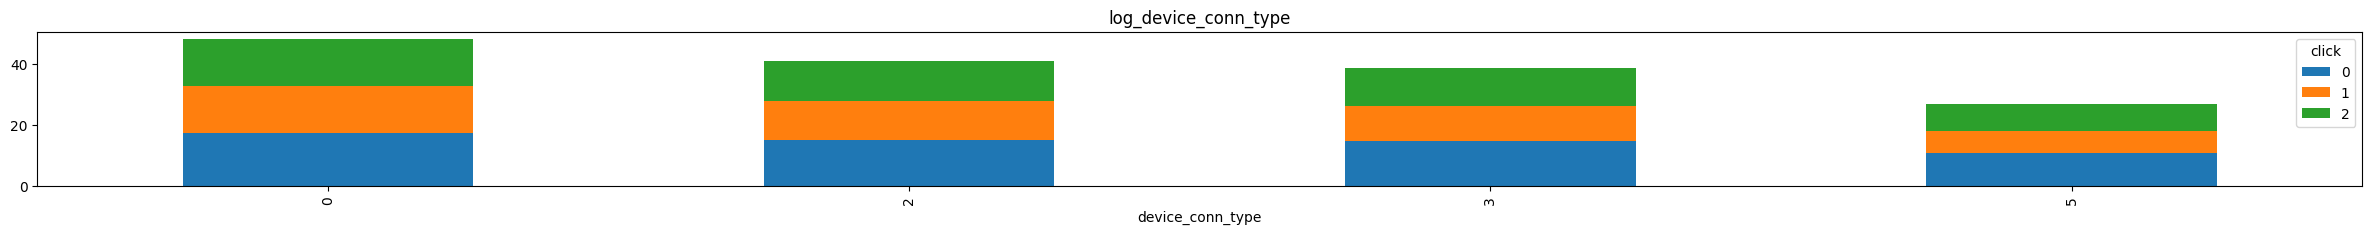

app_id 2023-01-14 10:10:46.280785
click              0          1          2
app_id                                    
ecad2386  20702171.0  5130659.0  2858160.0
92f5800b   1525269.0    30014.0   100556.0
e2fcccd2    909327.0   219689.0   154633.0
febd1138    722501.0    36597.0    79435.0
9c13b419    526425.0   231387.0   263762.0
...              ...        ...        ...
fc160a49         NaN        NaN      102.0
d4478ac2         NaN        NaN      100.0
f0f221aa         NaN        NaN       99.0
5c960463         NaN        NaN       98.0
f2ec65ae         NaN        NaN       98.0

[663 rows x 3 columns]


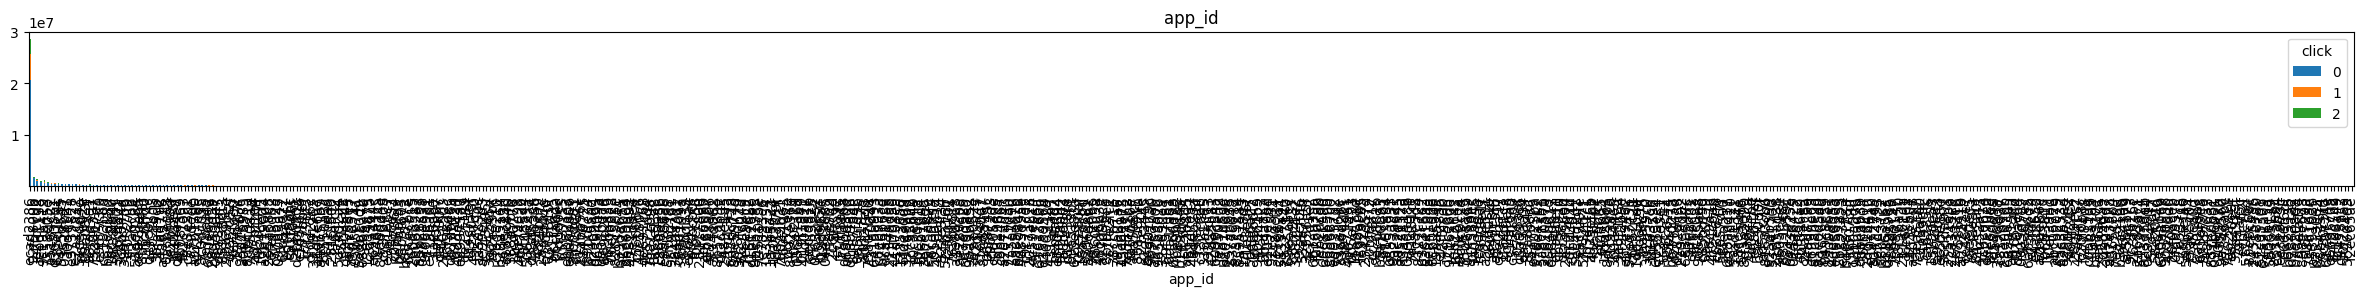

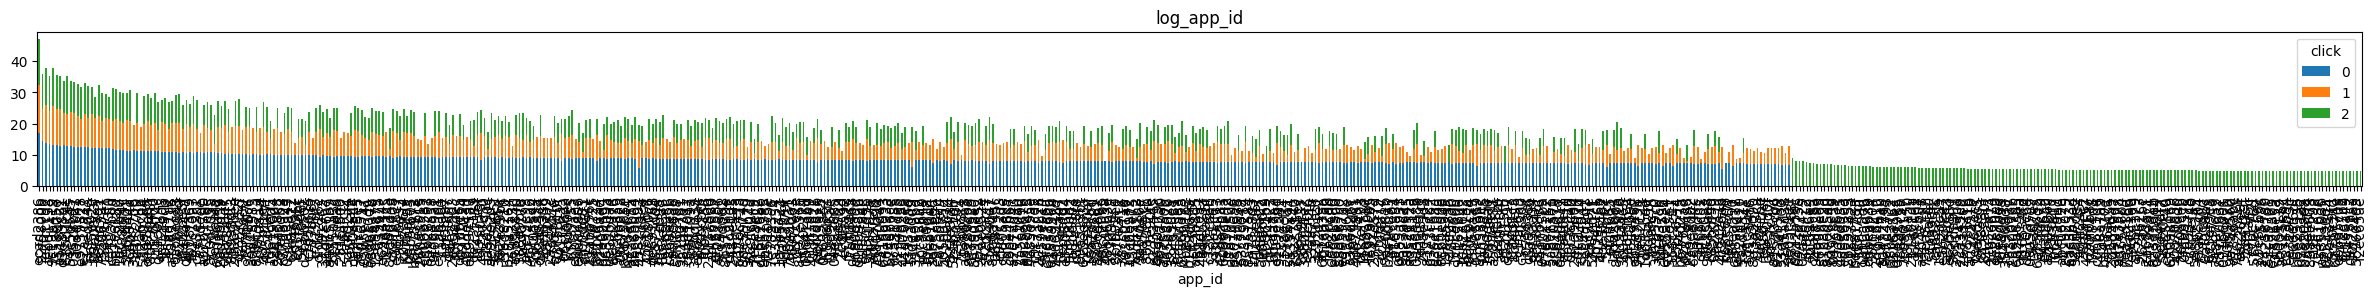

app_domain 2023-01-14 10:11:08.258773
click                0          1          2
app_domain                                  
7801e8d9    21929196.0  5307891.0  2972631.0
2347f47a     4517046.0   723839.0   826348.0
ae637522     1837085.0    44753.0   178851.0
5c5a694b      909529.0   219699.0   154734.0
82e27996      722527.0    36598.0    79435.0
...                ...        ...        ...
ad65a8a2           NaN        NaN        1.0
453cec02           NaN        NaN        1.0
3e611912           NaN        NaN        1.0
c9cc7d7f           NaN        NaN        1.0
d083df39           NaN        NaN        1.0

[528 rows x 3 columns]


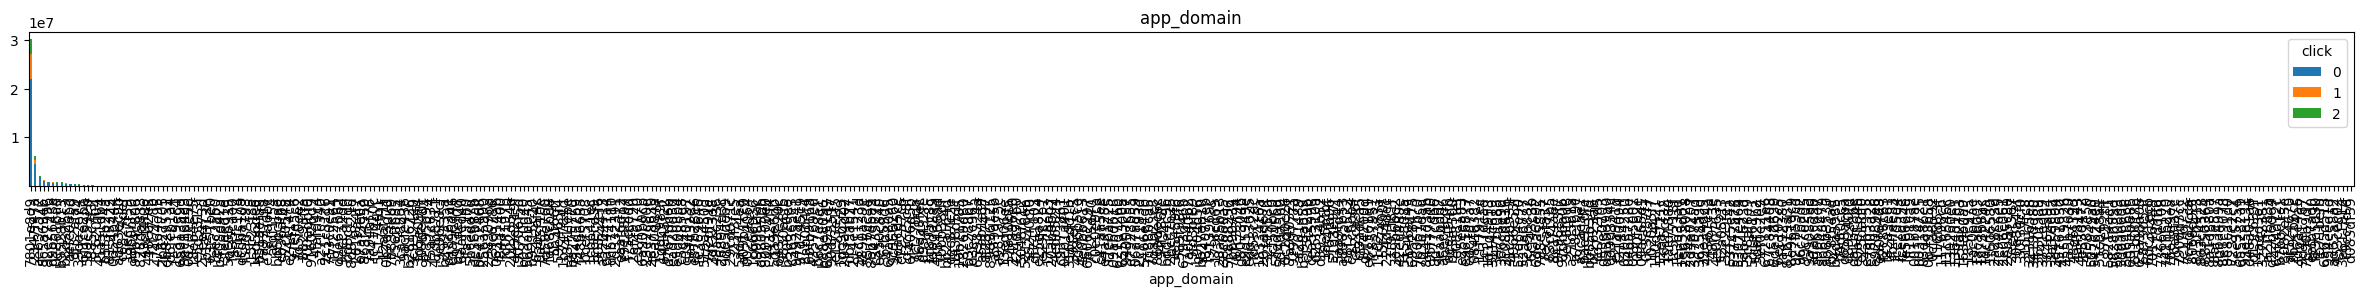

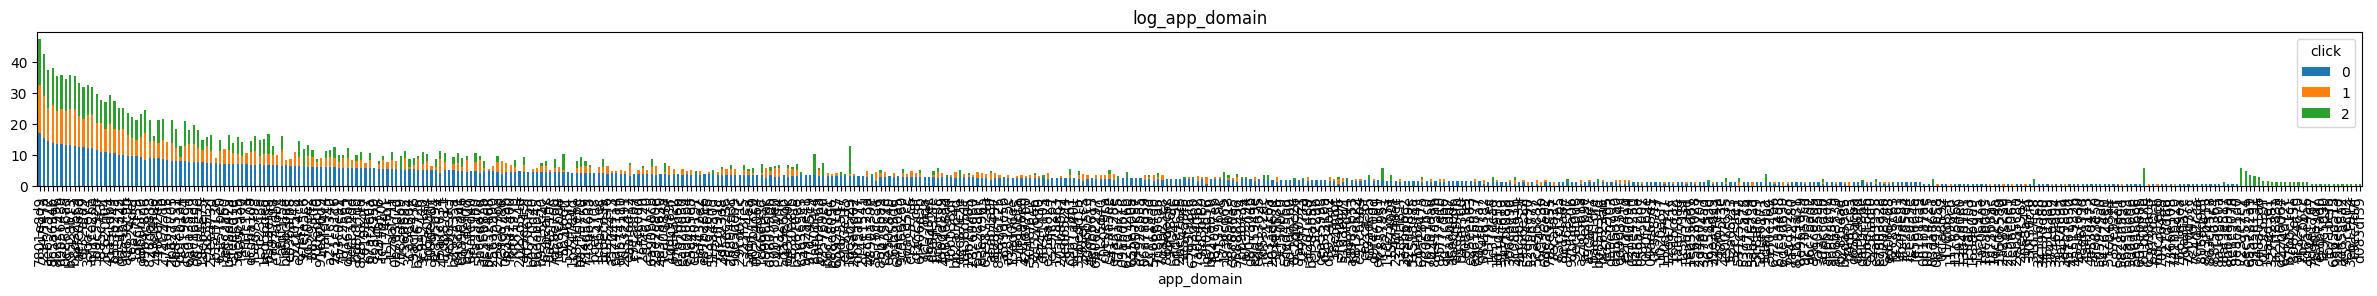

app_category 2023-01-14 10:11:26.214766
click                0        1          2
app_category                              
07d7df22      20954770  5210822  2881854.0
0f2161f8       8527338  1033720   886714.0
cef3e649       1570095   161450   180034.0
8ded1f7a       1335236   132021   295863.0
f95efa07        859009   282664   305571.0
d1327cf5        108036    15197     7037.0
09481d60         46368     8518     1734.0
dc97ec06         46092     8552     2795.0
75d80bbe         36259     3849     3581.0
fc6fa53d         22515     1148     4007.0
4ce2e9fc         18192     2570     3346.0
879c24eb         11446     1339     1972.0
a3c42688         10596      525      842.0
4681bb9d          5383      908      227.0
0f9a328c          4717      867      500.0
a86a3e89          2172      325      216.0
2281a340          2213       30      253.0
8df2e842          1243      436      117.0
79f0b860           570       35      571.0
0bfbc358           418        7        NaN
a7fd01ec      

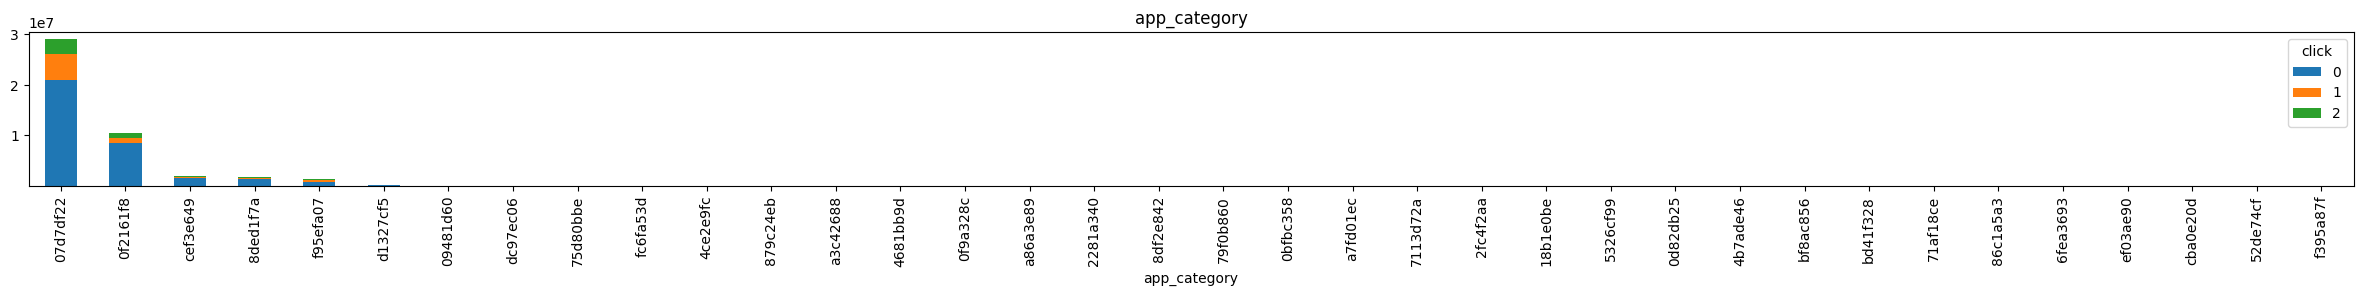

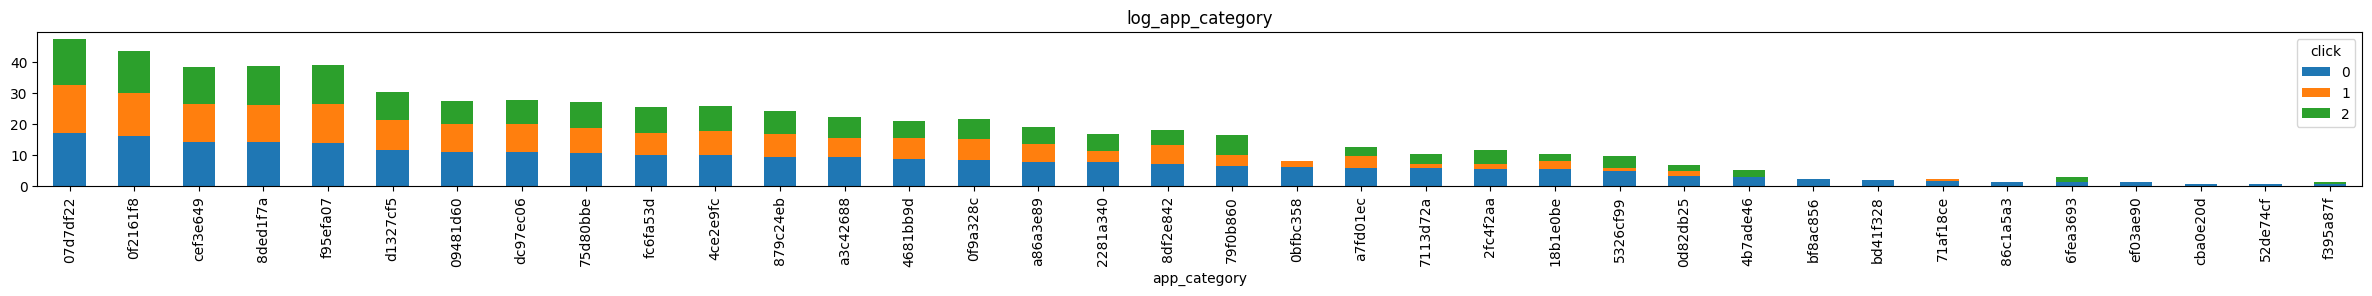

site_id 2023-01-14 10:11:34.015767
click              0          1          2
site_id                                   
85f751fd  12861730.0  1734407.0  1719304.0
1fbe01fe   5152386.0  1333764.0   429862.0
e151e245   1856119.0   781628.0   268872.0
d9750ee7    693780.0   269965.0    60313.0
5b08c53b    486615.0   426710.0    95816.0
...              ...        ...        ...
5d33ff07         NaN        NaN      143.0
71f71925         NaN        NaN      142.0
d653afd9         NaN        NaN      141.0
3e7b7453         NaN        NaN      140.0
ab156db4         NaN        NaN      140.0

[608 rows x 3 columns]


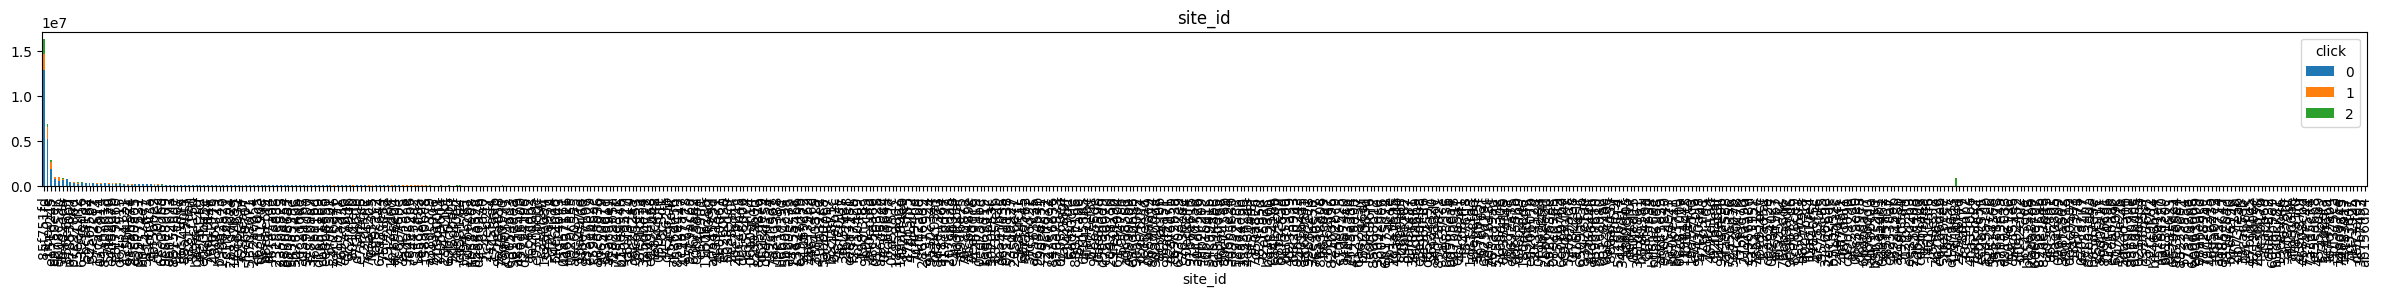

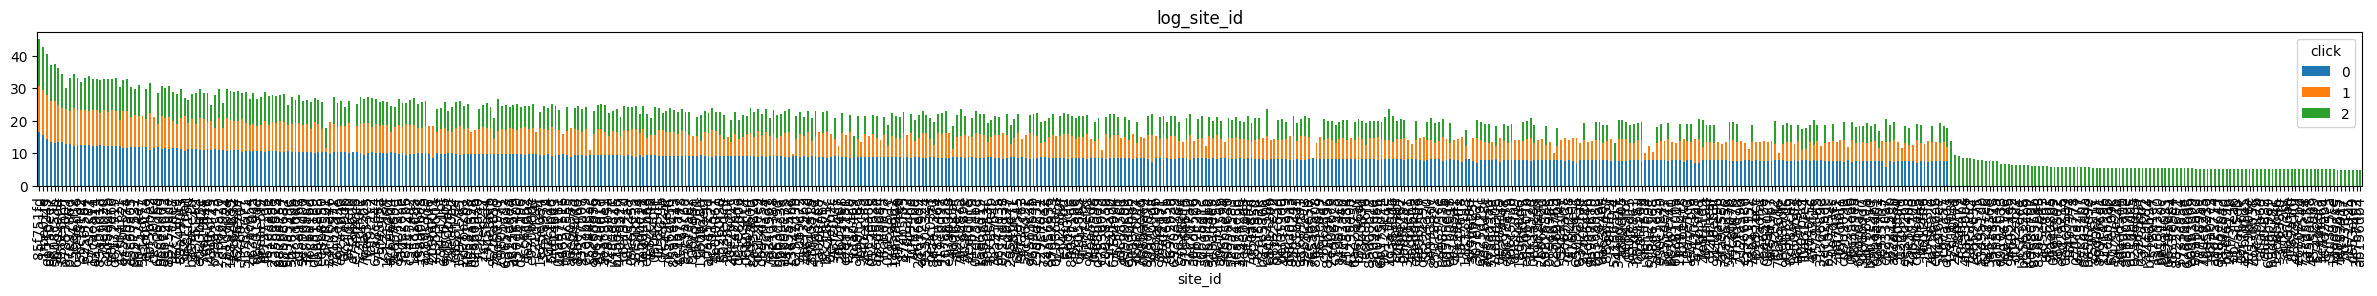

site_domain 2023-01-14 10:11:55.064767
click                 0          1          2
site_domain                                  
c4e18dd6     13274316.0  1857423.0  1759307.0
f3845767      5152386.0  1333764.0  1242915.0
7e091613      2465968.0   859040.0   274080.0
7687a86e       696901.0   593264.0   131548.0
98572c79       723320.0   273496.0    62563.0
...                 ...        ...        ...
c0ad7098            NaN        NaN       93.0
d6639bc9            NaN        NaN       93.0
7a556817            NaN        NaN       92.0
f6636447            NaN        NaN       92.0
e8d410d8            NaN        NaN       91.0

[594 rows x 3 columns]


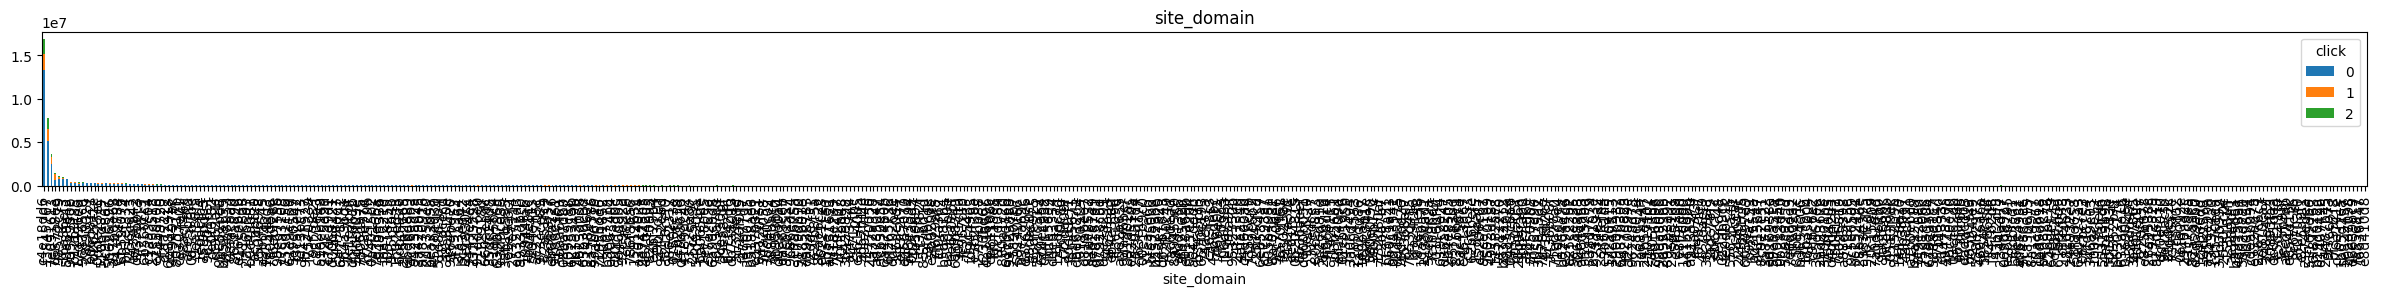

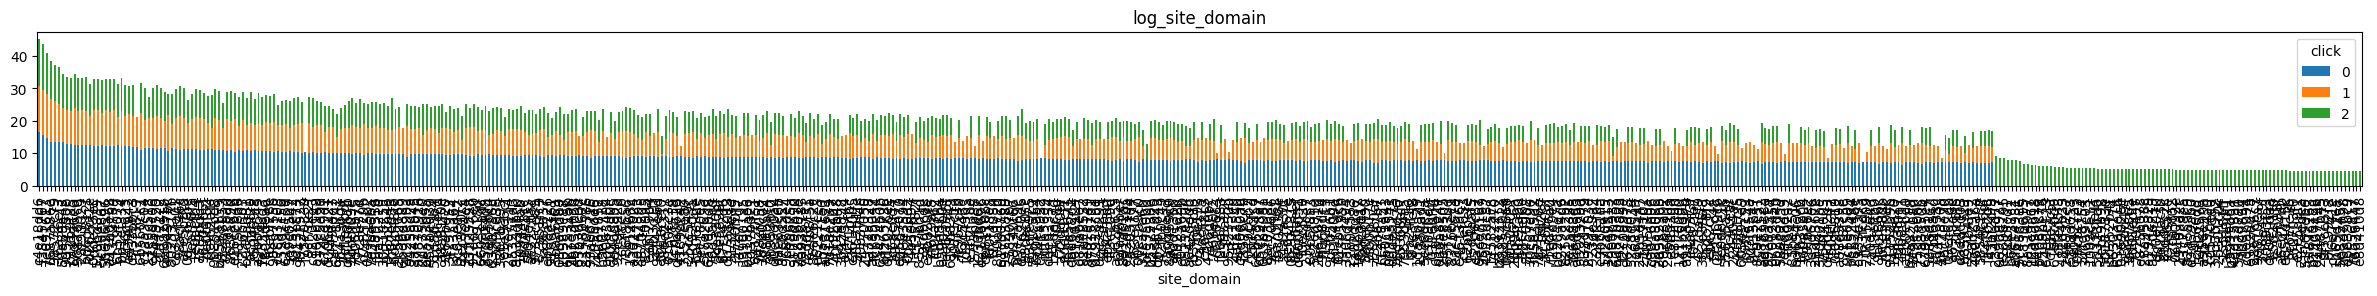

site_category 2023-01-14 10:12:15.915769
click                 0        1          2
site_category                              
50e219e0       14410884  2126350  1866181.0
f028772b       10384133  2272940  1824774.0
28905ebd        5842608  1534600   491584.0
3e814130        2187061   863245   289413.0
f66779e6         242432    10019     9228.0
75fa27f6         143070    17915    17793.0
335d28a8         123684    12779    14400.0
76b2941d         101584     3170     8019.0
c0dd3be3          37376     4714     6390.0
72722551          26590     1626     2469.0
dedf689d          11907    12593     1347.0
70fb0e29          20926     3298    19890.0
0569f928          16183      923      941.0
8fd0aea4           7371      111    11435.0
a818d37a           3217       13      402.0
42a36e14           1934      581      875.0
e787de0e           1120       89    12270.0
bcf865d9            997       48        2.0
5378d028            437       46       40.0
9ccfa2ea            314        4   

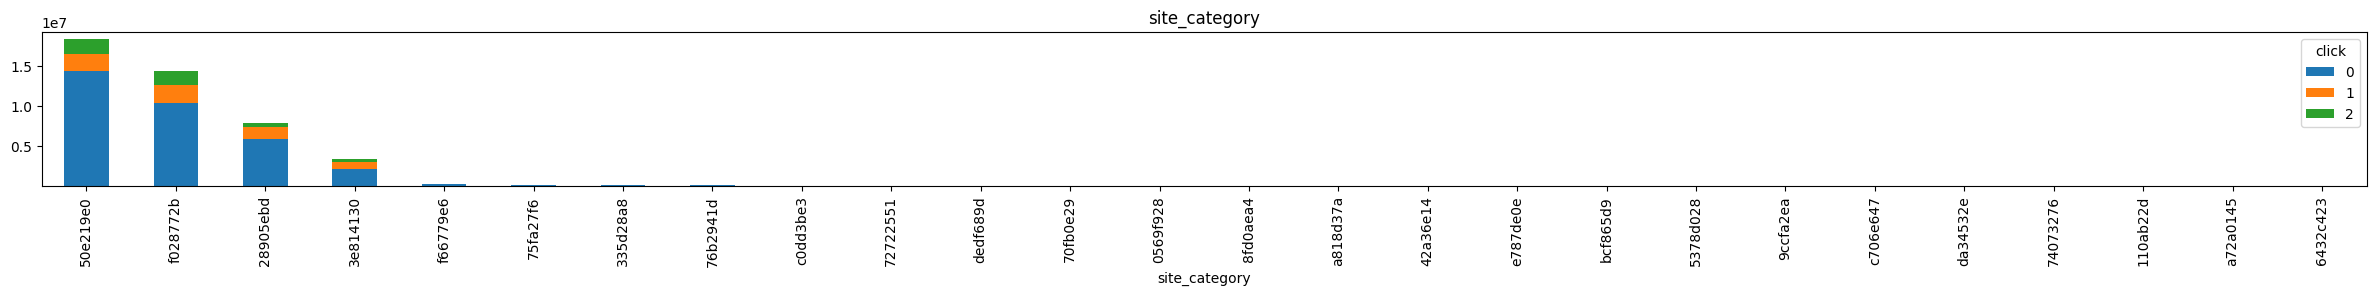

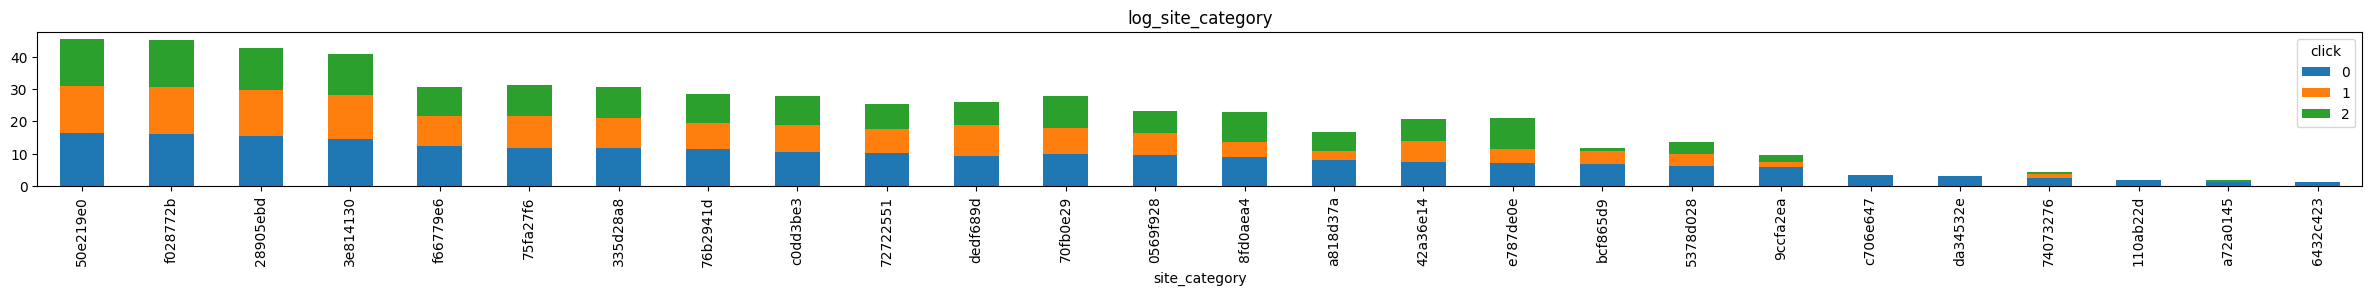

banner_pos 2023-01-14 10:12:23.693779
click              0        1          2
banner_pos                              
0           24327689  4781901  3653650.0
1            9182118  2065164   913194.0
7              29628    13949     5582.0
2              11451     1550     1582.0
4               6276     1428      207.0
5               5076      702        NaN
3               1663      372     3249.0


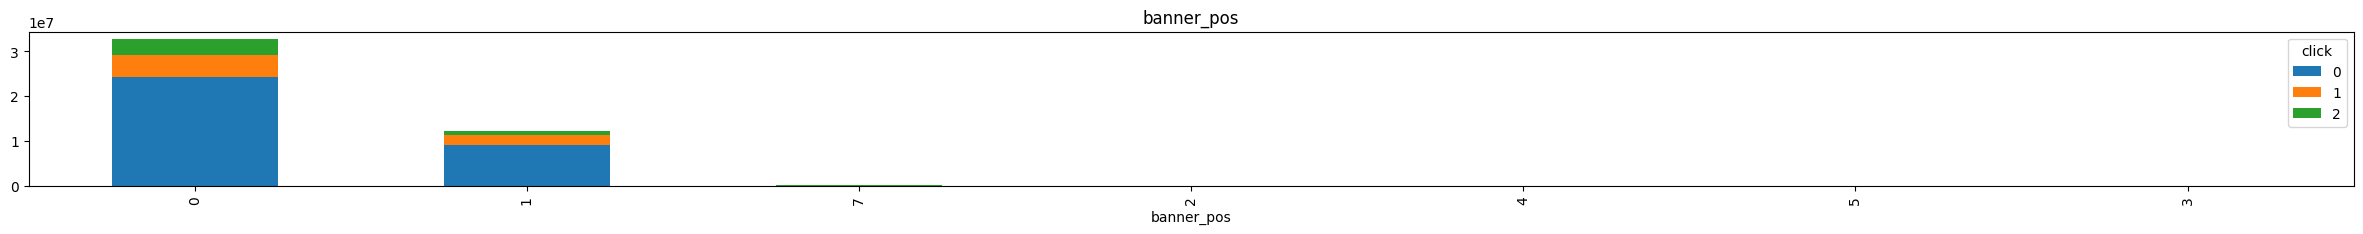

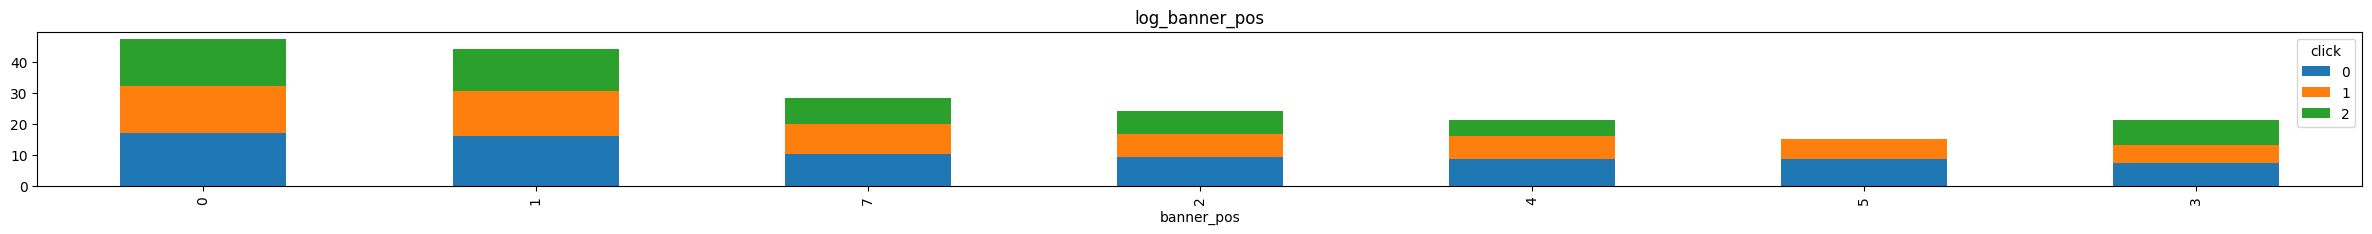

hour 2023-01-14 10:12:28.468533
click            0        1        2
hour                                
14102209  385373.0  62410.0      NaN
14102210  377082.0  61188.0      NaN
14102813  373228.0  59080.0      NaN
14102212  352533.0  56117.0      NaN
14102814  330865.0  56588.0      NaN
...            ...      ...      ...
14103103       NaN      NaN  98818.0
14103101       NaN      NaN  94948.0
14103122       NaN      NaN  91011.0
14103100       NaN      NaN  90990.0
14103123       NaN      NaN  82554.0

[264 rows x 3 columns]


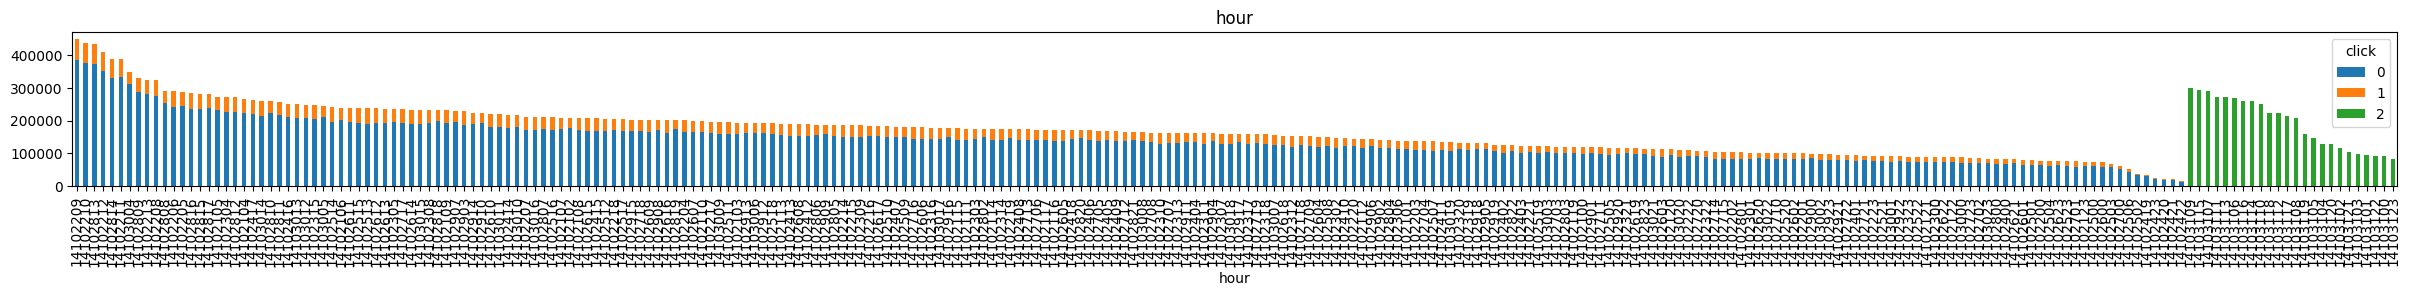

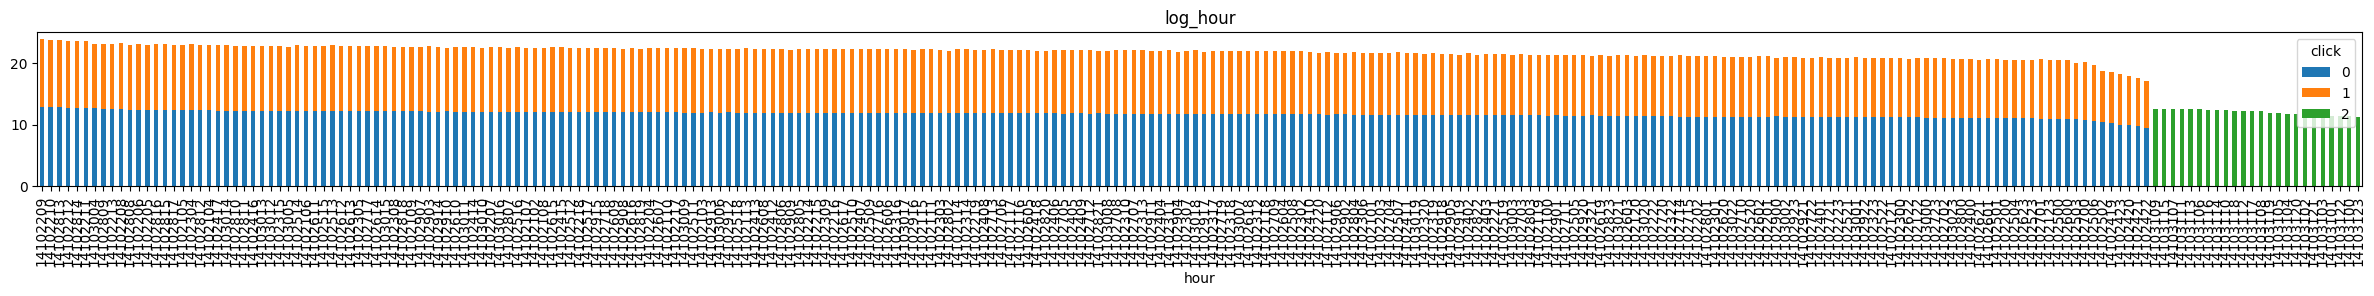

In [5]:
hour = ['hour']
banner = ['banner_pos']
site = ['site_id','site_domain','site_category']
app = ['app_id','app_domain','app_category']
device = ['device_id','device_ip','device_model','device_type','device_conn_type']
others = ['C1','C14','C15','C16','C17','C18','C19','C20','C21']
def plot_distribute(data=train,
                    columns= others+device+app+site+banner+hour ,
                    max_size=100):
    
    sub_train = data[data.click <= 1]
    sub_test = data[data.click == 2]
    result = dict()
    for i in columns:
        print(i)
        train_plot_df = pd.crosstab(sub_train[i],sub_train['click'])
        train_plot_df_index = train_plot_df.sum(axis=1).nlargest(max_size).index
        

        test_plot_df = pd.crosstab(sub_test[i],sub_test['click'])
        test_plot_df_index = test_plot_df.sum(axis=1).nlargest(max_size).index
        
        
        add_plot_df = pd.concat((train_plot_df.loc[train_plot_df_index,:],test_plot_df.loc[test_plot_df_index,:]),axis=1)
        add_plot_df.plot(kind='bar',stacked=True, title=i,figsize=(30, 2))
        
        add_plot_df_ln = np.log(add_plot_df.fillna(0)+1 )
        add_plot_df_ln.plot(kind='bar',stacked=True, title='log_'+i,figsize=(30, 2))
        print(add_plot_df)        
        pyplot.show()
        result.update({i:add_plot_df.index.tolist()})        
    with open('./avazu-ctr-prediction/all_columns/topN.json' , 'w') as f:
        f.write(json.dumps(result))        
plot_distribute(data=train,columns= others+device+app+site+banner+hour, max_size=500)


C:\Users\yswei\AppData\Local\Temp\ipykernel_12604\1381333283.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(train.loc[train['click']==0].corr().abs(),2), annot=True)


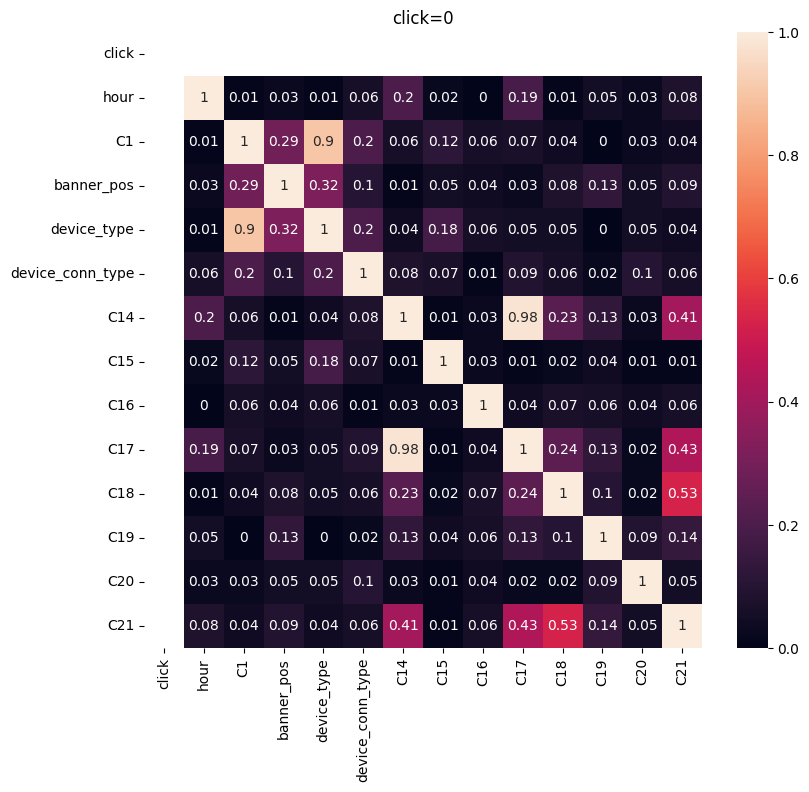

C:\Users\yswei\AppData\Local\Temp\ipykernel_12604\1381333283.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(train.loc[train['click']==1].corr().abs(),2), annot=True)


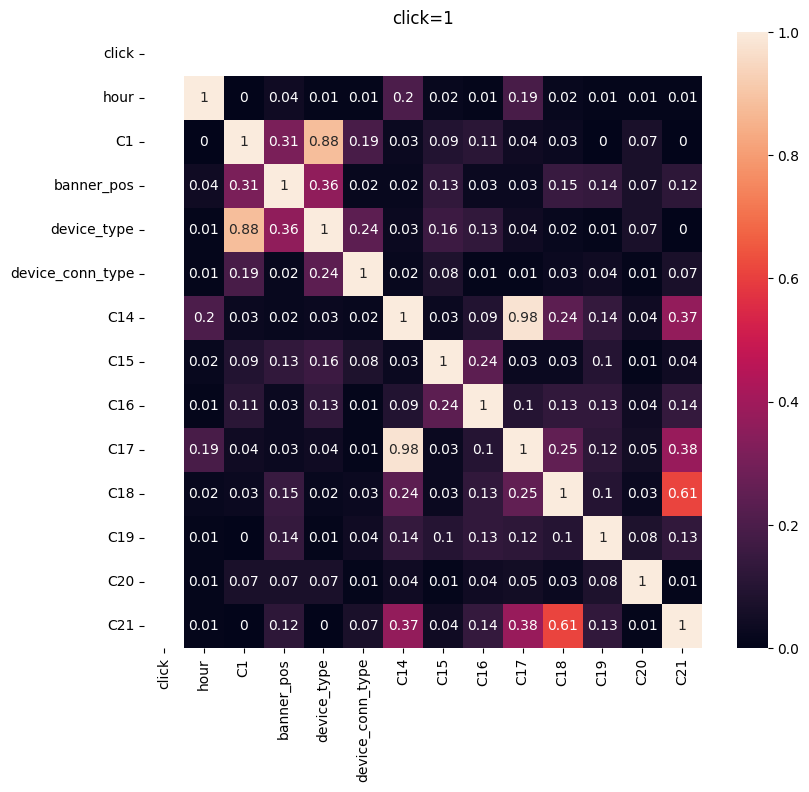

C:\Users\yswei\AppData\Local\Temp\ipykernel_12604\1381333283.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(train.loc[train['click']==2].corr().abs(),2), annot=True)


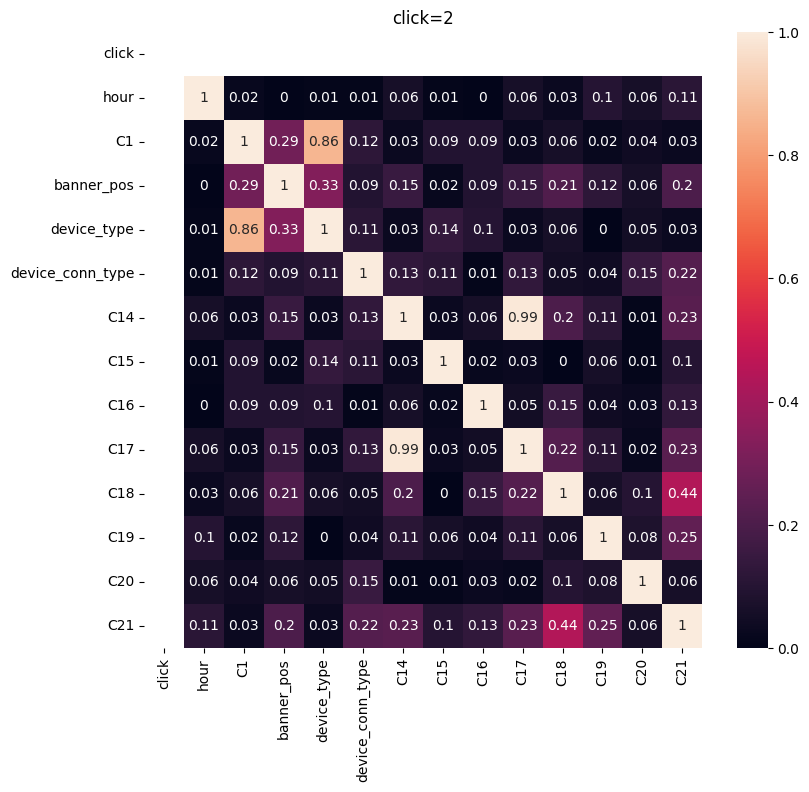

In [10]:
pyplot.figure(figsize=(9,8))
sns.heatmap(round(train.loc[train['click']==0].corr().abs(),2), annot=True)
pyplot.title('click=0')
pyplot.show()

pyplot.figure(figsize=(9,8))
sns.heatmap(round(train.loc[train['click']==1].corr().abs(),2), annot=True)
pyplot.title('click=1')
pyplot.show()

pyplot.figure(figsize=(9,8))
sns.heatmap(round(train.loc[train['click']==2].corr().abs(),2), annot=True)
pyplot.title('click=2')
pyplot.show()

In [3]:
def DE_process_1(train):
    #all with test dataset
    topN = json.load(open("./avazu-ctr-prediction/all_columns/topN.json", "r"))
    
    # Time
    train['day'] = train.hour//100%100
    train['hour'] = train.hour%100
    
    train['C_device_id'] = train['device_id'].apply(lambda x: x if x in ['a99f214a', 'afeffc18','936e92fb'] else 'other_device_id')  
    train['C_app_id'] = train["app_id"].apply(lambda x: x if x in topN['app_id'] else "other_app_id")
    train['C_site_id'] = train['site_id'].apply(lambda x: x if x in topN['site_id'] else "other_site_id")
    train['C_site_domain'] = train['site_domain'].apply(lambda x: x if x in topN['site_domain'] else "other_site_domain")
    train['C_device_model'] = train['device_model'].apply(lambda x: x if x in topN['device_model'] else "other_device_model")

    #Merge Similarity Dist
    train["C_1516"] = train["C15"].astype('U') + '&' + train["C16"].astype('U')
    train["C_1417"] = train["C14"].astype('U') + '&' + train["C17"].astype('U')
    train["C_device_type"] = train["device_type"].astype('U') + '&' + train["C1"].astype('U')
    train.drop(['device_id', "device_type", 'app_id', 'site_id', 'site_domain', 'device_model',"C1", "C14","C17", 'C15', 'C16'], axis=1, inplace=True)
    return train

train = DE_process_1(train=train)


In [4]:
def DE_process_2(data,col='C_site_id',expect_col='site_id_user'):    
    group_data = data.groupby([col])['device_ip'].agg([('uniq_count',lambda x : len(set(x)))]).reset_index()
    group_data['uniq_count'] = group_data['uniq_count'].apply(lambda x : int(np.log10(x)))    
    col_dict = {j[col]:j['uniq_count'] for _,j in group_data.iterrows()}
    data[expect_col] = data[col].map(col_dict)
    return data
train = DE_process_2(data=train, col='C_site_id',expect_col='site_id_user')
train = DE_process_2(data=train, col='C_app_id',expect_col='app_id_user')


In [5]:
def DE_process_3(data):
    dummies_site_category = pd.get_dummies(data['site_category'], prefix = 'site_category')
    dummies_app_category = pd.get_dummies(data['app_category'], prefix = 'app_category')
    data = pd.concat([data, dummies_site_category, dummies_app_category], axis=1)
    data.drop(['site_category', 'app_category'], axis = 1, inplace=True)
    return data
train = DE_process_3(data=train)


In [31]:
def DE_process_4(data, inplace=False):
    C_fields = [ 'day','hour', 'banner_pos', 'app_domain','C_device_id',
            'device_conn_type', 'C18', 'C19', 'C20','C21', 'C_app_id', 'C_site_id', 
            'C_site_domain', 'C_device_model', 'C_1516', 'C_1417', 'C_device_type']
    
    for col in  C_fields:
        print(col)
        index = 0
        mapping_table = dict()
        for j,_ in data[col].value_counts().items():
            mapping_table.update({j:int(index)})
            index = index +1
            
        data[col] = data[col].map(mapping_table)
        
    return data

train = DE_process_4(data=train)

C_device_id


# Part 3: Build Model

In [33]:
train[train.click<=1].to_csv('./etl_train.csv',index=None)
train[train.click==2].to_csv('./etl_test.csv',index=None)

In [34]:
train = train[train.click<=1]
gc.collect()

1453

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

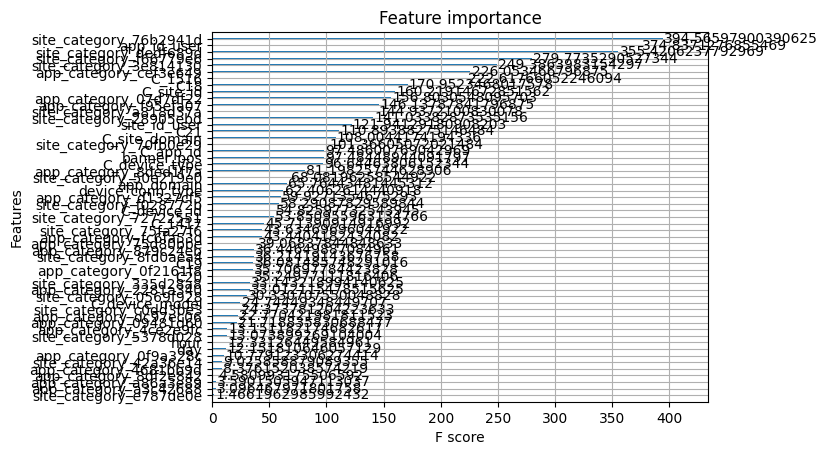

In [35]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
import matplotlib as pyplot
from sklearn.metrics import log_loss

model = xgb.XGBRegressor(n_estimators=500,
                         max_depth=10,
                         objective='binary:logistic',
                         min_child_weight=50,
                         subsample=0.8,
                         gamma=0,
                         learning_rate=0.2,
                         colsample_bytree=0.5,
                         seed=10)
model.fit(train.loc[:,[i for i in train.columns if i not in ['id','click', 'device_ip']]], train.click)

test = pd.read_csv('./etl_test.csv',dtype={'id':'U'})
predict_y = model.predict(test.loc[:,[i for i in train.columns if i not in ['id','click', 'device_ip']]])
test.click = predict_y
test.loc[:,['id','click']].to_csv('20230115_fulldata.csv',index=None)




<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

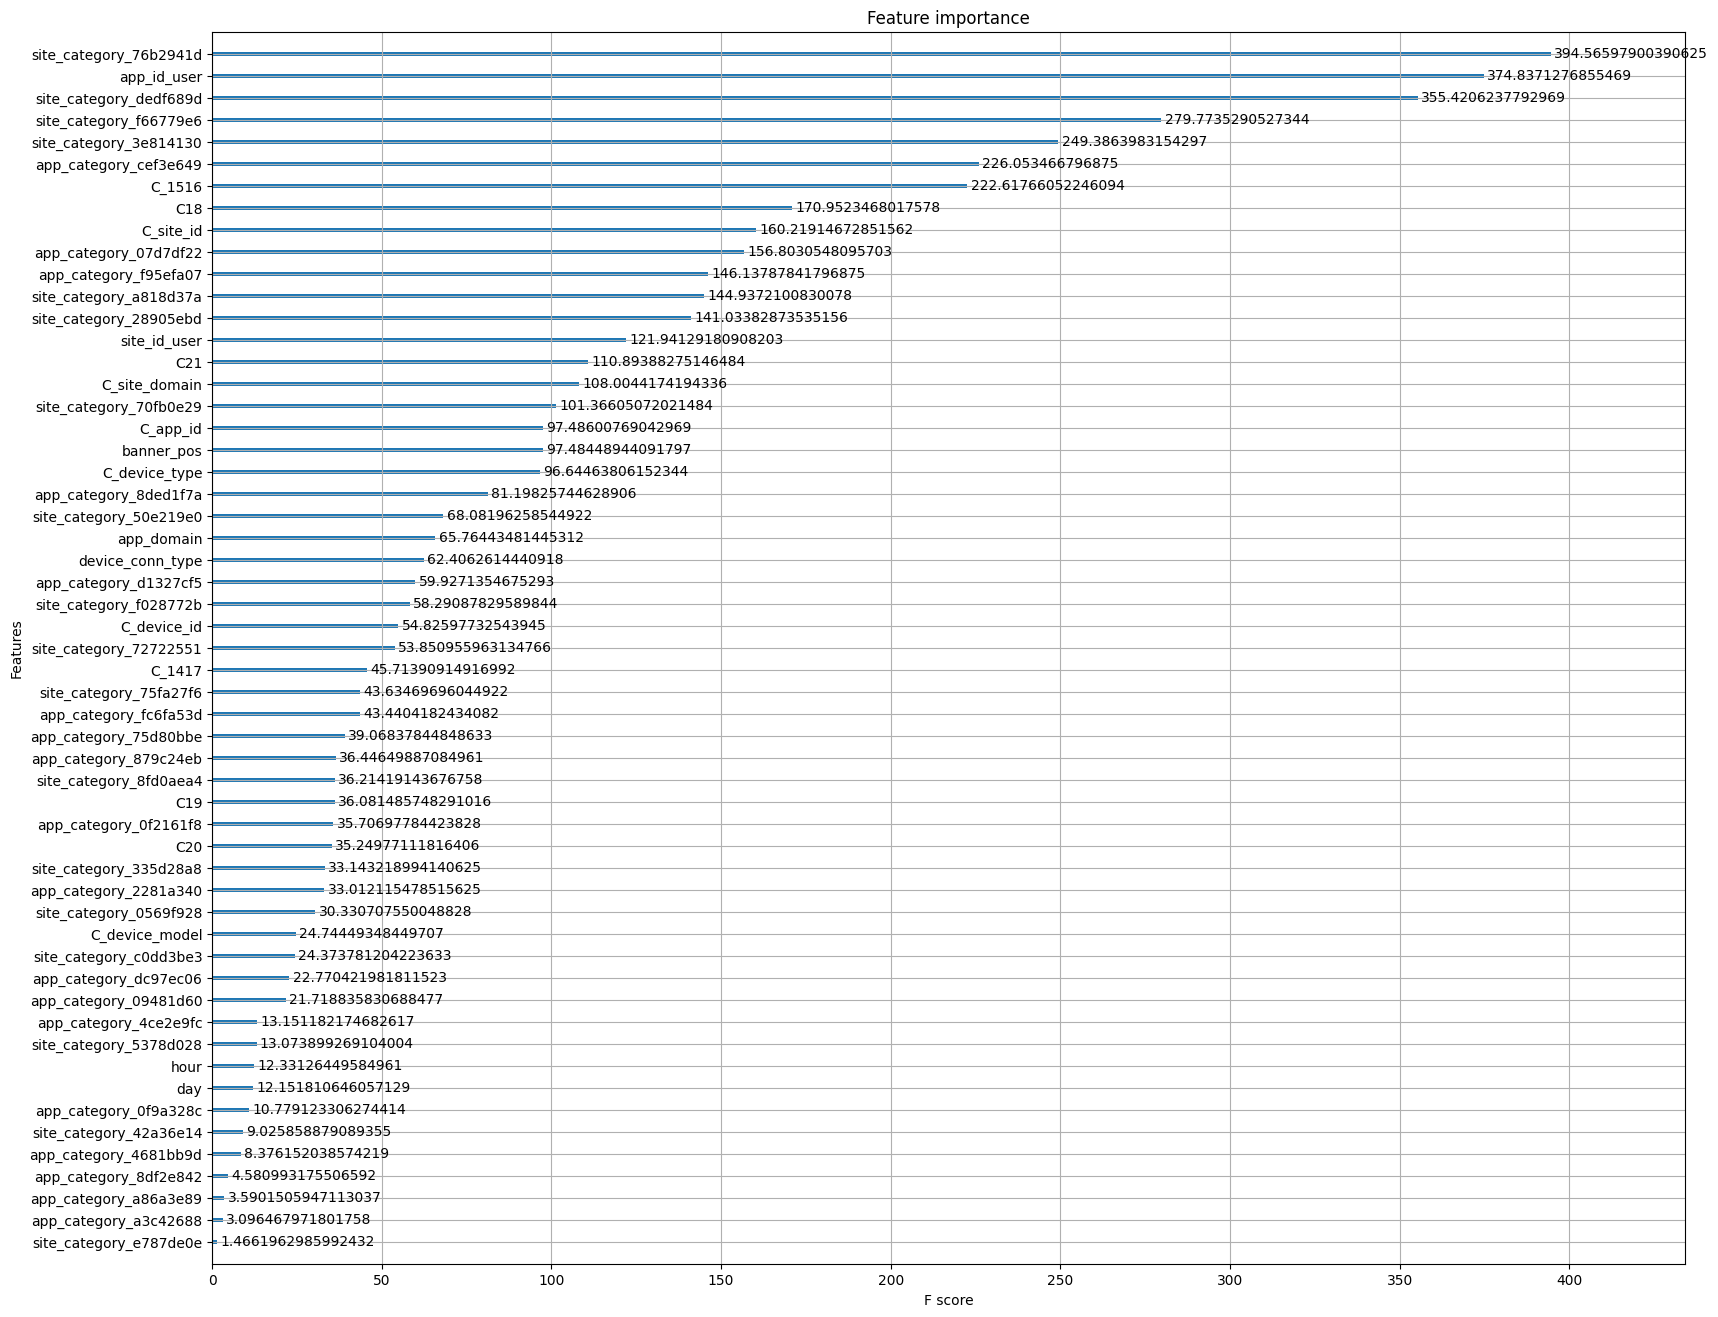

In [38]:
pyplot.rcParams["figure.figsize"] = (19, 16)
plot_importance(booster=model, importance_type="gain")